# Visualizing the 2022 Philippine Elections

## Presidential (City of Manila)

In [1]:
import pandas as pd, matplotlib.pyplot as plt, matplotlib.ticker as ticker, seaborn as sns, numpy as np, os
from matplotlib.ticker import FuncFormatter

df_pres = pd.read_csv(r'C:\Users\Ebo\DS162\placebo_first\Project_pers_test\2022 Elections\Datasets\pres.csv')

### Setting default visualization styles

In [2]:
sns.set_context('paper')
plt.rcParams['font.family'] = 'Gotham'
plt.rcParams['figure.dpi'] = 300

### Data wrangling: Presidential votes data

In [3]:
df_pres['region'].unique()

array(['BARMM', 'CORDILLERA ADMINISTRATIVE REGION',
       'NATIONAL CAPITAL REGION', 'OAV', 'REGION I', 'REGION II',
       'REGION III', 'REGION IV-A', 'REGION IV-B', 'REGION IX',
       'REGION V', 'REGION VI', 'REGION VII', 'REGION VIII', 'REGION X',
       'REGION XI', 'REGION XII', 'REGION XIII'], dtype=object)

In [4]:
df_pres.columns

Index(['Unnamed: 0', 'region', 'province', 'city', 'brgy', 'precinct',
       'total_votes', 'pres_1_abella', 'pres_2_de_guzman', 'pres_3_domagoso',
       'pres_4_gonzales', 'pres_5_lacson', 'pres_6_mangondato',
       'pres_7_marcos', 'pres_8_montemayor', 'pres_9_pacquiao',
       'pres_10_robredo'],
      dtype='object')

In [5]:
df_pres['region'].unique()

array(['BARMM', 'CORDILLERA ADMINISTRATIVE REGION',
       'NATIONAL CAPITAL REGION', 'OAV', 'REGION I', 'REGION II',
       'REGION III', 'REGION IV-A', 'REGION IV-B', 'REGION IX',
       'REGION V', 'REGION VI', 'REGION VII', 'REGION VIII', 'REGION X',
       'REGION XI', 'REGION XII', 'REGION XIII'], dtype=object)

In [6]:
df_pres['province'].unique()

array(['BASILAN', 'LANAO DEL SUR', 'MAGUINDANAO', 'SULU', 'TAWI-TAWI',
       'ABRA', 'APAYAO', 'BENGUET', 'IFUGAO', 'KALINGA',
       'MOUNTAIN PROVINCE', 'NCR - FOURTH DISTRICT', 'NCR - MANILA',
       'NCR - SECOND DISTRICT', 'NCR - THIRD DISTRICT',
       'TAGUIG - PATEROS', 'AMERICAS', 'ASIA PACIFIC', 'EUROPE',
       'MIDDLE EAST AND AFRICAS', 'ILOCOS NORTE', 'ILOCOS SUR',
       'LA UNION', 'PANGASINAN', 'BATANES', 'CAGAYAN', 'ISABELA',
       'NUEVA VIZCAYA', 'QUIRINO', 'AURORA', 'BATAAN', 'BULACAN',
       'NUEVA ECIJA', 'PAMPANGA', 'TARLAC', 'ZAMBALES', 'BATANGAS',
       'CAVITE', 'LAGUNA', 'QUEZON', 'RIZAL', 'MARINDUQUE',
       'OCCIDENTAL MINDORO', 'ORIENTAL MINDORO', 'PALAWAN', 'ROMBLON',
       'ZAMBOANGA DEL NORTE', 'ZAMBOANGA DEL SUR', 'ZAMBOANGA SIBUGAY',
       'ALBAY', 'CAMARINES NORTE', 'CAMARINES SUR', 'CATANDUANES',
       'MASBATE', 'SORSOGON', 'AKLAN', 'ANTIQUE', 'CAPIZ', 'GUIMARAS',
       'ILOILO', 'NEGROS OCCIDENTAL', 'BOHOL', 'CEBU', 'NEGROS ORIENTAL',
   

In [7]:
# Replace all names in the provinces

reg_dict = {
    'BARMM': 'Bangsamoro',
    'CORDILLERA ADMINISTRATIVE REGION': 'Cordillera',
    'NATIONAL CAPITAL REGION': 'Metro Manila',
    'OAV': 'Overseas',
    'REGION I': 'Ilocos',
    'REGION II': 'Cagayan Valley',
    'REGION III': 'Central Luzon',
    'REGION IV-A': 'CALABARZON',
    'REGION IV-B': 'MIMAROPA',
    'REGION IX': 'Zamboanga Peninsula',
    'REGION V': 'Bicol',
    'REGION VI': 'Western Visayas',
    'REGION VII': 'Central Visayas',
    'REGION VIII': 'Eastern Visayas',
    'REGION X': 'Northern Mindanao',
    'REGION XI': 'Davao', 
    'REGION XII': 'SOCCSKSARGEN',
    'REGION XIII': 'Caraga'
}

df_pres['region'] = df_pres['region'].replace(reg_dict)

In [8]:
prov_dict = {
    'NCR - FOURTH DISTRICT': 'NCR-South',
    'NCR - MANILA': 'NCR-Manila',
    'NCR - SECOND DISTRICT': 'NCR-East',
    'NCR - THIRD DISTRICT': 'NCR-North',
    'TAGUIG - PATEROS': 'NCR-South'
}

df_pres['province'] = df_pres['province'].replace(prov_dict).fillna(df_pres['province'])

In [9]:
other_prov_dict = {
    'BASILAN': 'Basilan',
    'LANAO DEL SUR': 'Lanao del Sur',
    'MAGUINDANAO': 'Maguindanao',
    'SULU': 'Sulu',
    'TAWI-TAWI': 'Tawi-Tawi',
    'ABRA': 'Abra',
    'APAYAO': 'Apayao',
    'BENGUET': 'Benguet',
    'IFUGAO': 'Ifugao',
    'KALINGA': 'Kalinga',
    'MOUNTAIN PROVINCE': 'Mountain Province',
    'AMERICAS': 'Americas',
    'ASIA PACIFIC': 'Asia Pacific',
    'EUROPE': 'Europe',
    'MIDDLE EAST AND AFRICAS': 'Middle East and Africas',
    'ILOCOS NORTE': 'Ilocos Norte',
    'ILOCOS SUR': 'Ilocos Sur',
    'LA UNION': 'La Union',
    'PANGASINAN': 'Pangasinan',
    'BATANES': 'Batanes',
    'CAGAYAN': 'Cagayan',
    'ISABELA': 'Isabela',
    'NUEVA VIZCAYA': 'Nueva Vizcaya',
    'QUIRINO': 'Quirino',
    'AURORA': 'Aurora',
    'BATAAN': 'Bataan',
    'BULACAN': 'Bulacan',
    'NUEVA ECIJA': 'Nueva Ecija',
    'PAMPANGA': 'Pampanga',
    'TARLAC': 'Tarlac',
    'ZAMBALES': 'Zambales',
    'BATANGAS': 'Batangas',
    'CAVITE': 'Cavite',
    'LAGUNA': 'Laguna',
    'QUEZON': 'Quezon',
    'RIZAL': 'Rizal',
    'MARINDUQUE': 'Marinduque',
    'OCCIDENTAL MINDORO': 'Occidental Mindoro',
    'ORIENTAL MINDORO': 'Oriental Mindoro',
    'PALAWAN': 'Palawan',
    'ROMBLON': 'Romblon',
    'ZAMBOANGA DEL NORTE': 'Zamboanga del Norte',
    'ZAMBOANGA DEL SUR': 'Zamboanga del Sur',
    'ZAMBOANGA SIBUGAY': 'Zamboanga Sibugay',
    'ALBAY': 'Albay',
    'CAMARINES NORTE': 'Camarines Norte',
    'CAMARINES SUR': 'Camarines Sur',
    'CATANDUANES': 'Catanduanes',
    'MASBATE': 'Masbate',
    'SORSOGON': 'Sorsogon',
    'AKLAN': 'Aklan',
    'ANTIQUE': 'Antique',
    'CAPIZ': 'Capiz',
    'GUIMARAS': 'Guimaras',
    'ILOILO': 'Iloilo',
    'NEGROS OCCIDENTAL': 'Negros Occidental',
    'BOHOL': 'Bohol',
    'CEBU': 'Cebu',
    'NEGROS ORIENTAL': 'Negros Oriental',
    'SIQUIJOR': 'Siquijor',
    'BILIRAN': 'Biliran',
    'EASTERN SAMAR': 'Eastern Samar',
    'LEYTE': 'Leyte',
    'NORTHERN SAMAR': 'Northern Samar',
    'SAMAR': 'Samar',
    'SOUTHERN LEYTE': 'Southern Leyte',
    'BUKIDNON': 'Bukidnon',
    'CAMIGUIN': 'Camiguin',
    'LANAO DEL NORTE': 'Lanao del Norte',
    'MISAMIS OCCIDENTAL': 'Misamis Occidental',
    'MISAMIS ORIENTAL': 'Misamis Oriental',
    'DAVAO DE ORO': 'Davao de Oro',
    'DAVAO DEL NORTE': 'Davao del Norte',
    'DAVAO DEL SUR': 'Davao del Sur',
    'DAVAO OCCIDENTAL': 'Davao Occidental',
    'DAVAO ORIENTAL': 'Davao Oriental',
    'COTABATO': 'Cotabato',
    'SARANGANI': 'Sarangani',
    'SOUTH COTABATO': 'South Cotabato',
    'SULTAN KUDARAT': 'Sultan Kudarat',
    'AGUSAN DEL NORTE': 'Agusan del Norte',
    'AGUSAN DEL SUR': 'Agusan del Sur',
    'DINAGAT ISLANDS': 'Dinagat Islands',
    'SURIGAO DEL NORTE': 'Surigao del Norte',
    'SURIGAO DEL SUR': 'Surigao del Sur'
}

df_pres['province'] = df_pres['province'].replace(other_prov_dict).fillna(df_pres['province'])

In [10]:
# Remove cities' caps lock names and replace with proper noun names
def capitalize_municipio(city):
    articles = ['de', 'del', 'dela']
    words = city.split()
    capitalized_words = []
    for word in words:
        if word.lower() == "d'o":
            capitalized_words.append("D'O")
        elif word.lower() == "d'a":
            capitalized_words.append("D'A")
        else:
            if word.lower().startswith("d'"):
                word = "D'" + word[2:].capitalize()
            else:
                word = word.capitalize() if word.lower() not in articles else word.lower()
            capitalized_words.append(word)
    return ' '.join(capitalized_words)

df_pres['city'] = df_pres['city'].apply(capitalize_municipio)
df_pres['brgy'] = df_pres['brgy'].apply(capitalize_municipio)

In [11]:
df_pres.columns

Index(['Unnamed: 0', 'region', 'province', 'city', 'brgy', 'precinct',
       'total_votes', 'pres_1_abella', 'pres_2_de_guzman', 'pres_3_domagoso',
       'pres_4_gonzales', 'pres_5_lacson', 'pres_6_mangondato',
       'pres_7_marcos', 'pres_8_montemayor', 'pres_9_pacquiao',
       'pres_10_robredo'],
      dtype='object')

In [12]:
cols_to_combine = ['pres_1_abella', 'pres_2_de_guzman', 'pres_4_gonzales', 'pres_6_mangondato', 'pres_8_montemayor']

# Sum the values across the columns axis to create the 'Others' column
df_pres['Others'] = df_pres[cols_to_combine].sum(axis=1)

# Drop the original columns
df_pres.drop(columns=cols_to_combine, inplace=True)

In [13]:
df_pres['province'].unique()

array(['Basilan', 'Lanao del Sur', 'Maguindanao', 'Sulu', 'Tawi-Tawi',
       'Abra', 'Apayao', 'Benguet', 'Ifugao', 'Kalinga',
       'Mountain Province', 'NCR-South', 'NCR-Manila', 'NCR-East',
       'NCR-North', 'Americas', 'Asia Pacific', 'Europe',
       'Middle East and Africas', 'Ilocos Norte', 'Ilocos Sur',
       'La Union', 'Pangasinan', 'Batanes', 'Cagayan', 'Isabela',
       'Nueva Vizcaya', 'Quirino', 'Aurora', 'Bataan', 'Bulacan',
       'Nueva Ecija', 'Pampanga', 'Tarlac', 'Zambales', 'Batangas',
       'Cavite', 'Laguna', 'Quezon', 'Rizal', 'Marinduque',
       'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Romblon',
       'Zamboanga del Norte', 'Zamboanga del Sur', 'Zamboanga Sibugay',
       'Albay', 'Camarines Norte', 'Camarines Sur', 'Catanduanes',
       'Masbate', 'Sorsogon', 'Aklan', 'Antique', 'Capiz', 'Guimaras',
       'Iloilo', 'Negros Occidental', 'Bohol', 'Cebu', 'Negros Oriental',
       'Siquijor', 'Biliran', 'Eastern Samar', 'Leyte', 'Northern Sa

In [14]:
# # Manila's districts were listed as it is, not as a whole city
# # Map the listed districts to the city
# # List of Manila's 16 districts: Binondo, Ermita, Intramuros, Malate, Paco, Pandacan, Port Area, Quiapo, Sampaloc, San Andres, San Miguel, San Nicolas, Santa Ana, Santa Cruz, Santa Mesa, Tondo

# manila_map = {
#     'Binondo': 'Manila',
#     'Ermita': 'Manila',
#     'Intramuros': 'Manila',
#     'Malate': 'Manila',
#     'Paco': 'Manila',
#     'Pandacan': 'Manila',
#     'Port Area': 'Manila',
#     'Quiapo': 'Manila',
#     'Sampaloc': 'Manila',
#     'San Andres': 'Manila',
#     'San Miguel': 'Manila',
#     'San Nicolas': 'Manila',
#     'Santa Ana': 'Manila',
#     'Santa Cruz': 'Manila',
#     'Santa Mesa': 'Manila',
#     'Tondo': 'Manila'
# }

# df_pres['city'] = df_pres['city'].replace(manila_map)

### Visualizing Votes within the City of Manila

In [15]:
df_manilacityproper = df_pres[(df_pres['region'] == 'Metro Manila') & (df_pres['province'] == 'NCR-Manila')].reset_index(drop=True).sort_values(by='brgy', ascending=True).copy()

In [16]:
df_manilacityproper['brgy'].unique()

array(['Barangay 1', 'Barangay 100', 'Barangay 101', 'Barangay 102',
       'Barangay 103', 'Barangay 104', 'Barangay 105', 'Barangay 106',
       'Barangay 107', 'Barangay 108', 'Barangay 109', 'Barangay 11',
       'Barangay 110', 'Barangay 111', 'Barangay 112', 'Barangay 116',
       'Barangay 117', 'Barangay 118', 'Barangay 119', 'Barangay 12',
       'Barangay 120', 'Barangay 121', 'Barangay 122', 'Barangay 123',
       'Barangay 124', 'Barangay 125', 'Barangay 126', 'Barangay 127',
       'Barangay 128', 'Barangay 129', 'Barangay 13', 'Barangay 130',
       'Barangay 131', 'Barangay 132', 'Barangay 133', 'Barangay 134',
       'Barangay 135', 'Barangay 136', 'Barangay 137', 'Barangay 138',
       'Barangay 139', 'Barangay 14', 'Barangay 140', 'Barangay 141',
       'Barangay 142', 'Barangay 143', 'Barangay 144', 'Barangay 145',
       'Barangay 146', 'Barangay 147', 'Barangay 148', 'Barangay 149',
       'Barangay 15', 'Barangay 150', 'Barangay 151', 'Barangay 152',
       'Baran

In [17]:
# The following are the barangays under the district of Santa Mesa (587-636, incl. 587-A) and San Andres (745-808, incl. 818-A)

# Define the barangay to Santa Mesa mapping
barangay_map = {f'Barangay {i}': 'Santa Mesa' for i in range(587, 637)}
barangay_map.update({f'Barangay {i}': 'San Andres' for i in range(745, 809)})
barangay_map['Barangay 587-a'] = 'Santa Mesa'
barangay_map['Barangay 818-a'] = 'San Andres'

df_manilacityproper['city'] = df_manilacityproper.apply(
    lambda row: barangay_map.get(row['brgy'], row['city']), axis=1)

df_manilacityproper[df_manilacityproper['city'].isin(['Sampaloc', 'Santa Mesa', 'San Andres'])]

,Unnamed: 0,region,province,city,brgy,precinct,total_votes,pres_3_domagoso,pres_5_lacson,pres_7_marcos,pres_9_pacquiao,pres_10_robredo,Others
390,9008,Metro Manila,NCR-Manila,Sampaloc,Barangay 395,39060923,329,88,6,165,4,65,1
389,9007,Metro Manila,NCR-Manila,Sampaloc,Barangay 395,39060922,303,91,2,147,3,58,2
391,9009,Metro Manila,NCR-Manila,Sampaloc,Barangay 396,39060924,548,119,7,230,5,186,1
393,9011,Metro Manila,NCR-Manila,Sampaloc,Barangay 397,39060926,253,38,6,97,5,107,0
392,9010,Metro Manila,NCR-Manila,Sampaloc,Barangay 397,39060925,382,52,8,153,2,166,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,9578,Metro Manila,NCR-Manila,San Andres,Barangay 807,39141534,307,85,8,128,2,83,1
959,9577,Metro Manila,NCR-Manila,San Andres,Barangay 807,39141533,414,101,19,145,9,135,5
961,9579,Metro Manila,NCR-Manila,San Andres,Barangay 808,39141535,618,146,14,272,2,180,4
963,9581,Metro Manila,NCR-Manila,San Andres,Barangay 818-a,39141555,330,117,2,126,0,84,1


In [18]:
df_manilacityproper

,Unnamed: 0,region,province,city,brgy,precinct,total_votes,pres_3_domagoso,pres_5_lacson,pres_7_marcos,pres_9_pacquiao,pres_10_robredo,Others
1831,10449,Metro Manila,NCR-Manila,Tondo,Barangay 1,39010003,415,133,8,165,7,97,5
1829,10447,Metro Manila,NCR-Manila,Tondo,Barangay 1,39010001,445,109,6,194,6,128,2
1830,10448,Metro Manila,NCR-Manila,Tondo,Barangay 1,39010002,412,123,4,187,4,92,2
1202,9820,Metro Manila,NCR-Manila,Tondo,Barangay 100,39010248,588,278,4,223,1,81,1
1203,9821,Metro Manila,NCR-Manila,Tondo,Barangay 100,39010249,555,248,3,205,1,96,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,10442,Metro Manila,NCR-Manila,Tondo,Barangay 97,39010243,625,292,3,195,2,131,2
1823,10441,Metro Manila,NCR-Manila,Tondo,Barangay 97,39010242,619,280,12,204,2,116,5
1826,10444,Metro Manila,NCR-Manila,Tondo,Barangay 98,39010245,658,264,4,264,6,118,2
1827,10445,Metro Manila,NCR-Manila,Tondo,Barangay 99,39010246,397,132,5,187,1,71,1


In [19]:
df_manilacityproper['city'].unique()

array(['Tondo', 'San Nicolas', 'Binondo', 'Santa Cruz', 'Quiapo',
       'Sampaloc', 'Santa Mesa', 'San Miguel', 'Port Area', 'Intramuros',
       'Ermita', 'Paco', 'Malate', 'San Andres', 'Pandacan', 'Santa Ana'],
      dtype=object)

In [20]:
numerical_cols = ['total_votes', 'pres_3_domagoso', 'pres_5_lacson',
                  'pres_7_marcos', 'pres_9_pacquiao', 'pres_10_robredo', 'Others']

In [21]:
df_manilacitypropergrp = df_manilacityproper.groupby('city')[numerical_cols].sum().reset_index().sort_values(by='total_votes', ascending=True).reset_index(drop=True)

In [22]:
df_manilacitypropergrp

,city,total_votes,pres_3_domagoso,pres_5_lacson,pres_7_marcos,pres_9_pacquiao,pres_10_robredo,Others
0,Intramuros,4410,1482,48,1898,38,919,25
1,Binondo,6913,1318,237,3547,93,1685,33
2,San Miguel,7892,2083,132,3082,62,2159,374
3,Ermita,9049,1757,122,4189,126,2793,62
4,Quiapo,15061,4716,206,6442,109,3273,315
5,San Nicolas,23832,8410,430,10584,253,4064,91
6,Port Area,26984,9906,175,11919,1049,3398,537
7,Santa Ana,31154,10166,426,12054,182,8188,138
8,Paco,36671,10574,524,15174,266,9992,141
9,Pandacan,40645,13737,524,16549,218,9482,135


In [23]:
def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x * 1e-9:.1f}b'
    elif x >= 1e6:
        return f'{x * 1e-6:.1f}m'
    elif x >= 1e3:
        return f'{x * 1e-3:.1f}k'
    else:
        return f'{x:.0f}'

In [24]:
plot_dir = 'plots'
os.makedirs(plot_dir, exist_ok=True)

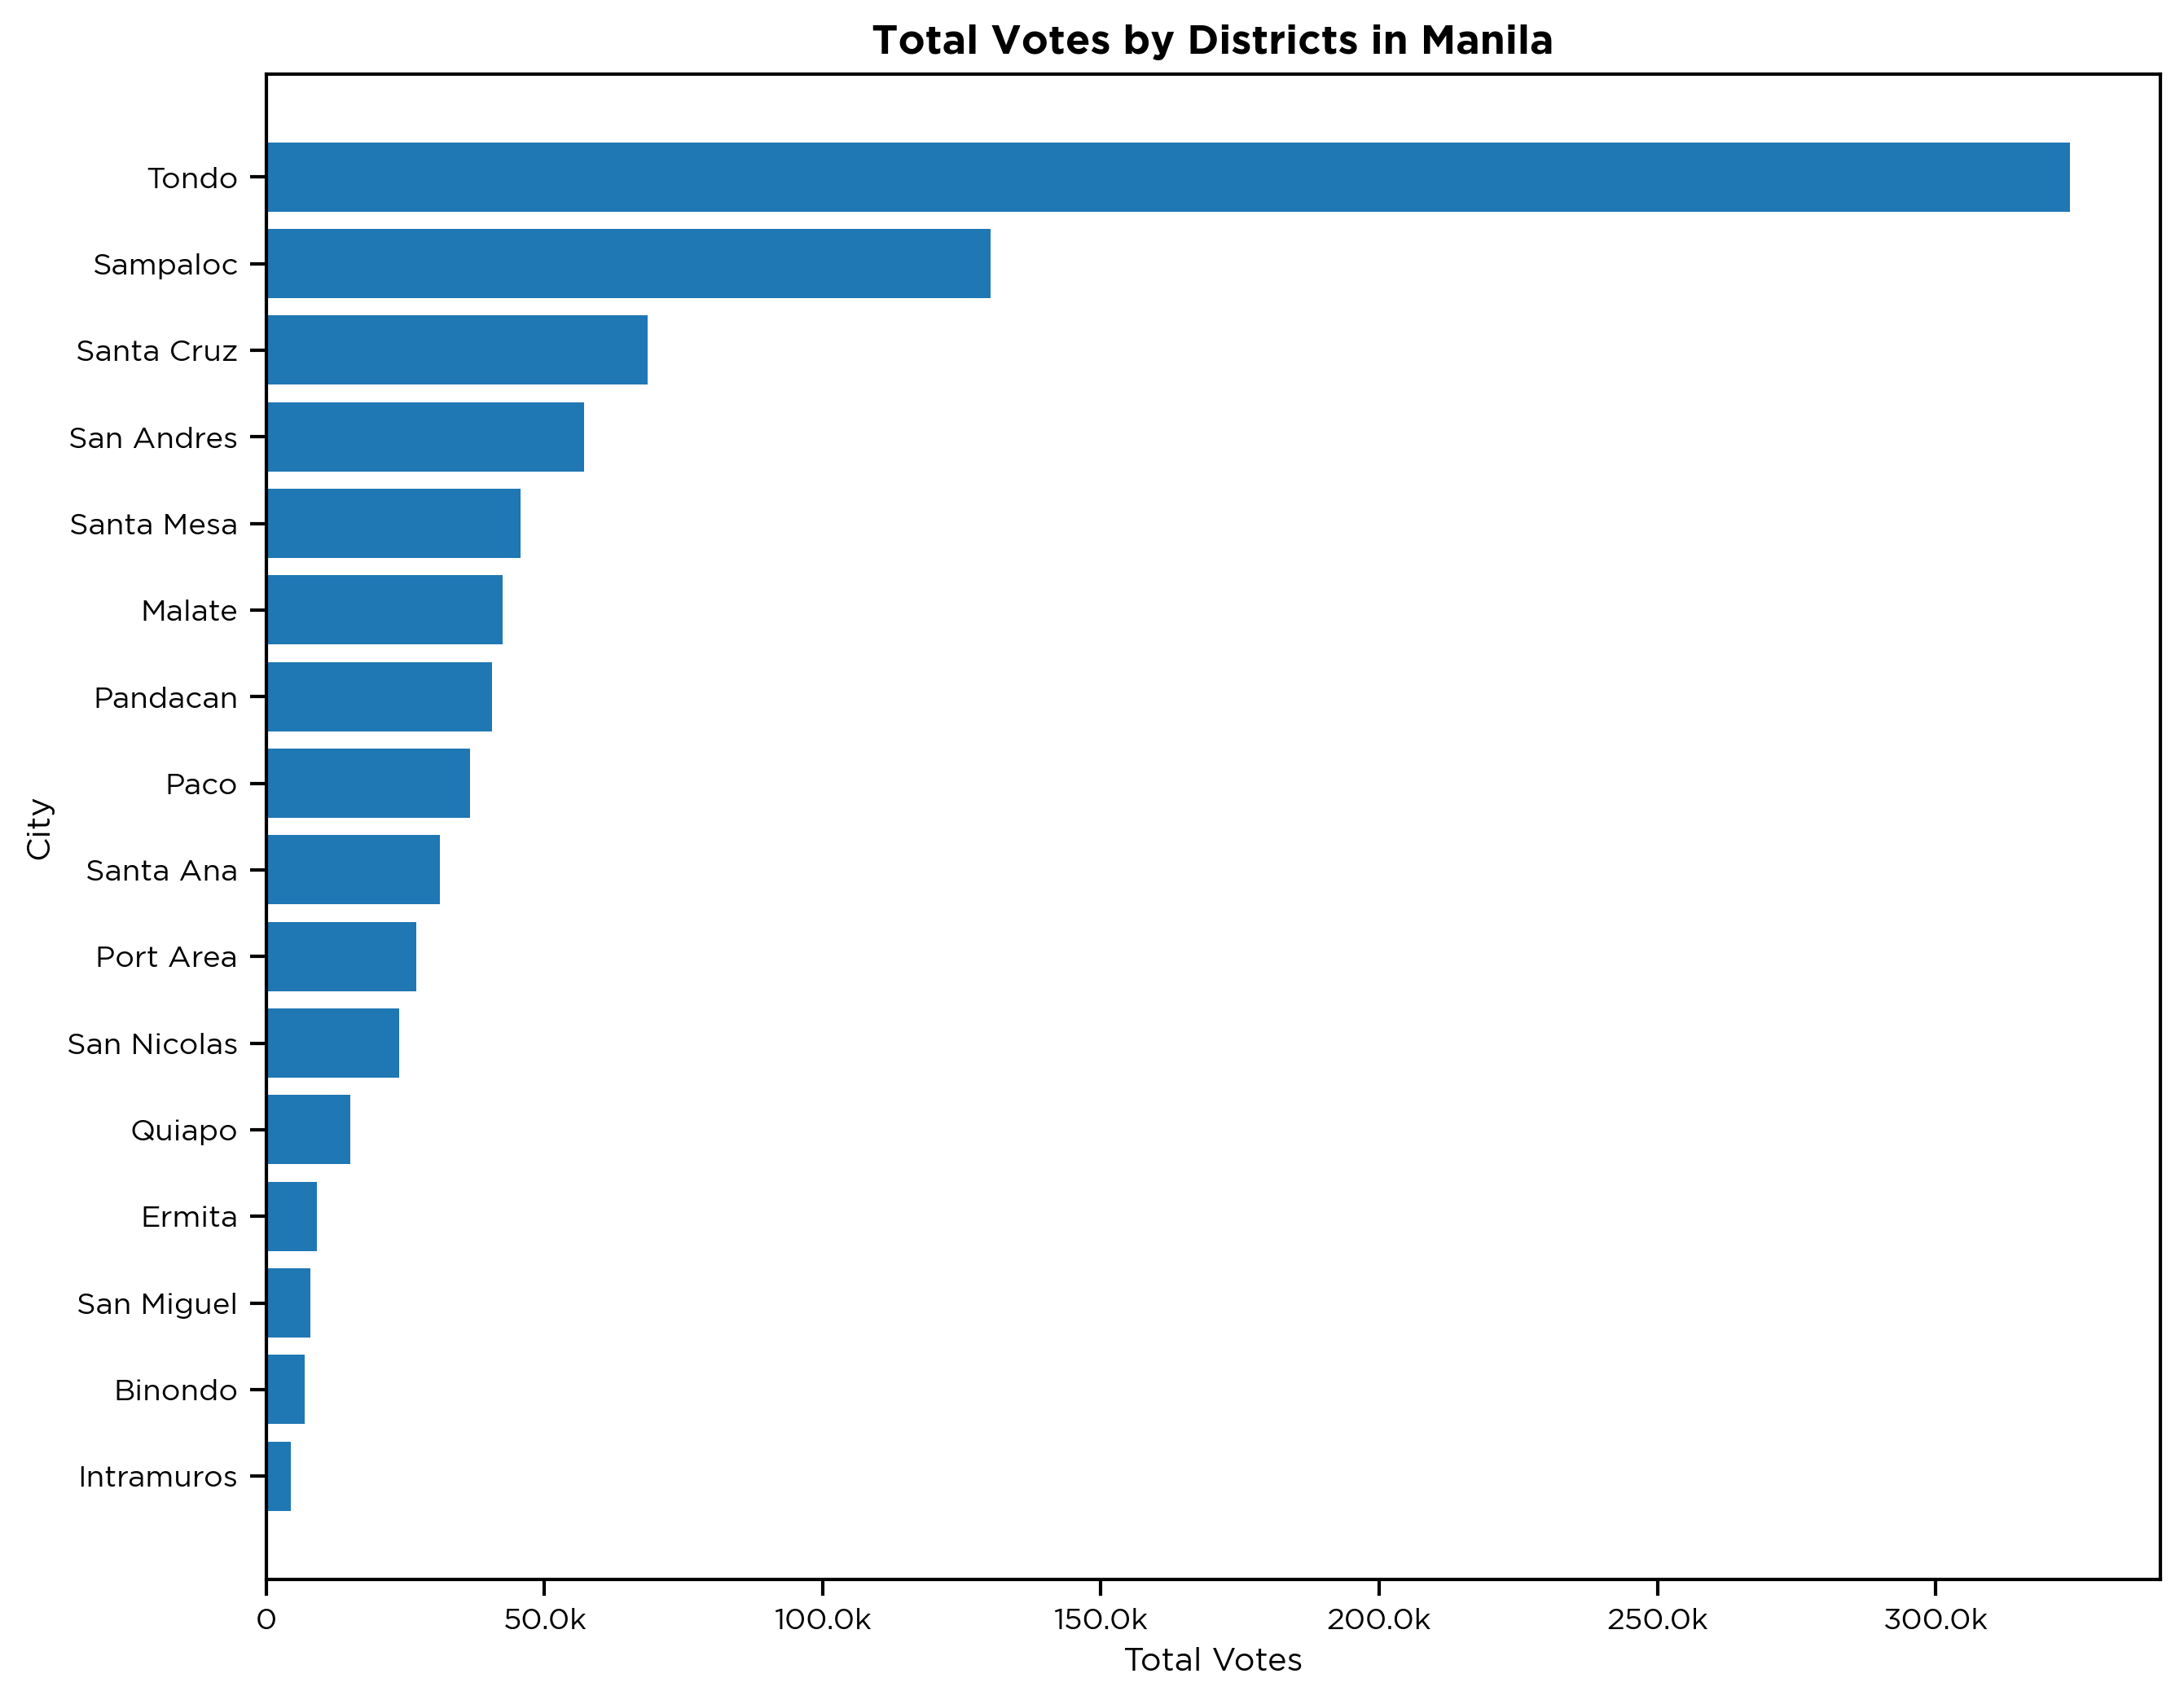

In [25]:
df_manilacitypropergrp = pd.DataFrame(df_manilacitypropergrp)

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(df_manilacitypropergrp['city'], df_manilacitypropergrp['total_votes'])

# Adding title and labels
plt.title('Total Votes by Districts in Manila', fontsize=12, fontweight='bold')
plt.xlabel('Total Votes')
plt.ylabel('City')

# Apply the custom tick formatter to the x-axis
formatter = ticker.FuncFormatter(format_ticks)

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Save the plot
plot_path = os.path.join(plot_dir, 'manila_pres_totalvotes.png')
plt.savefig(plot_path, dpi=600, bbox_inches='tight', pad_inches=0.125)

# Show the plot
plt.show()

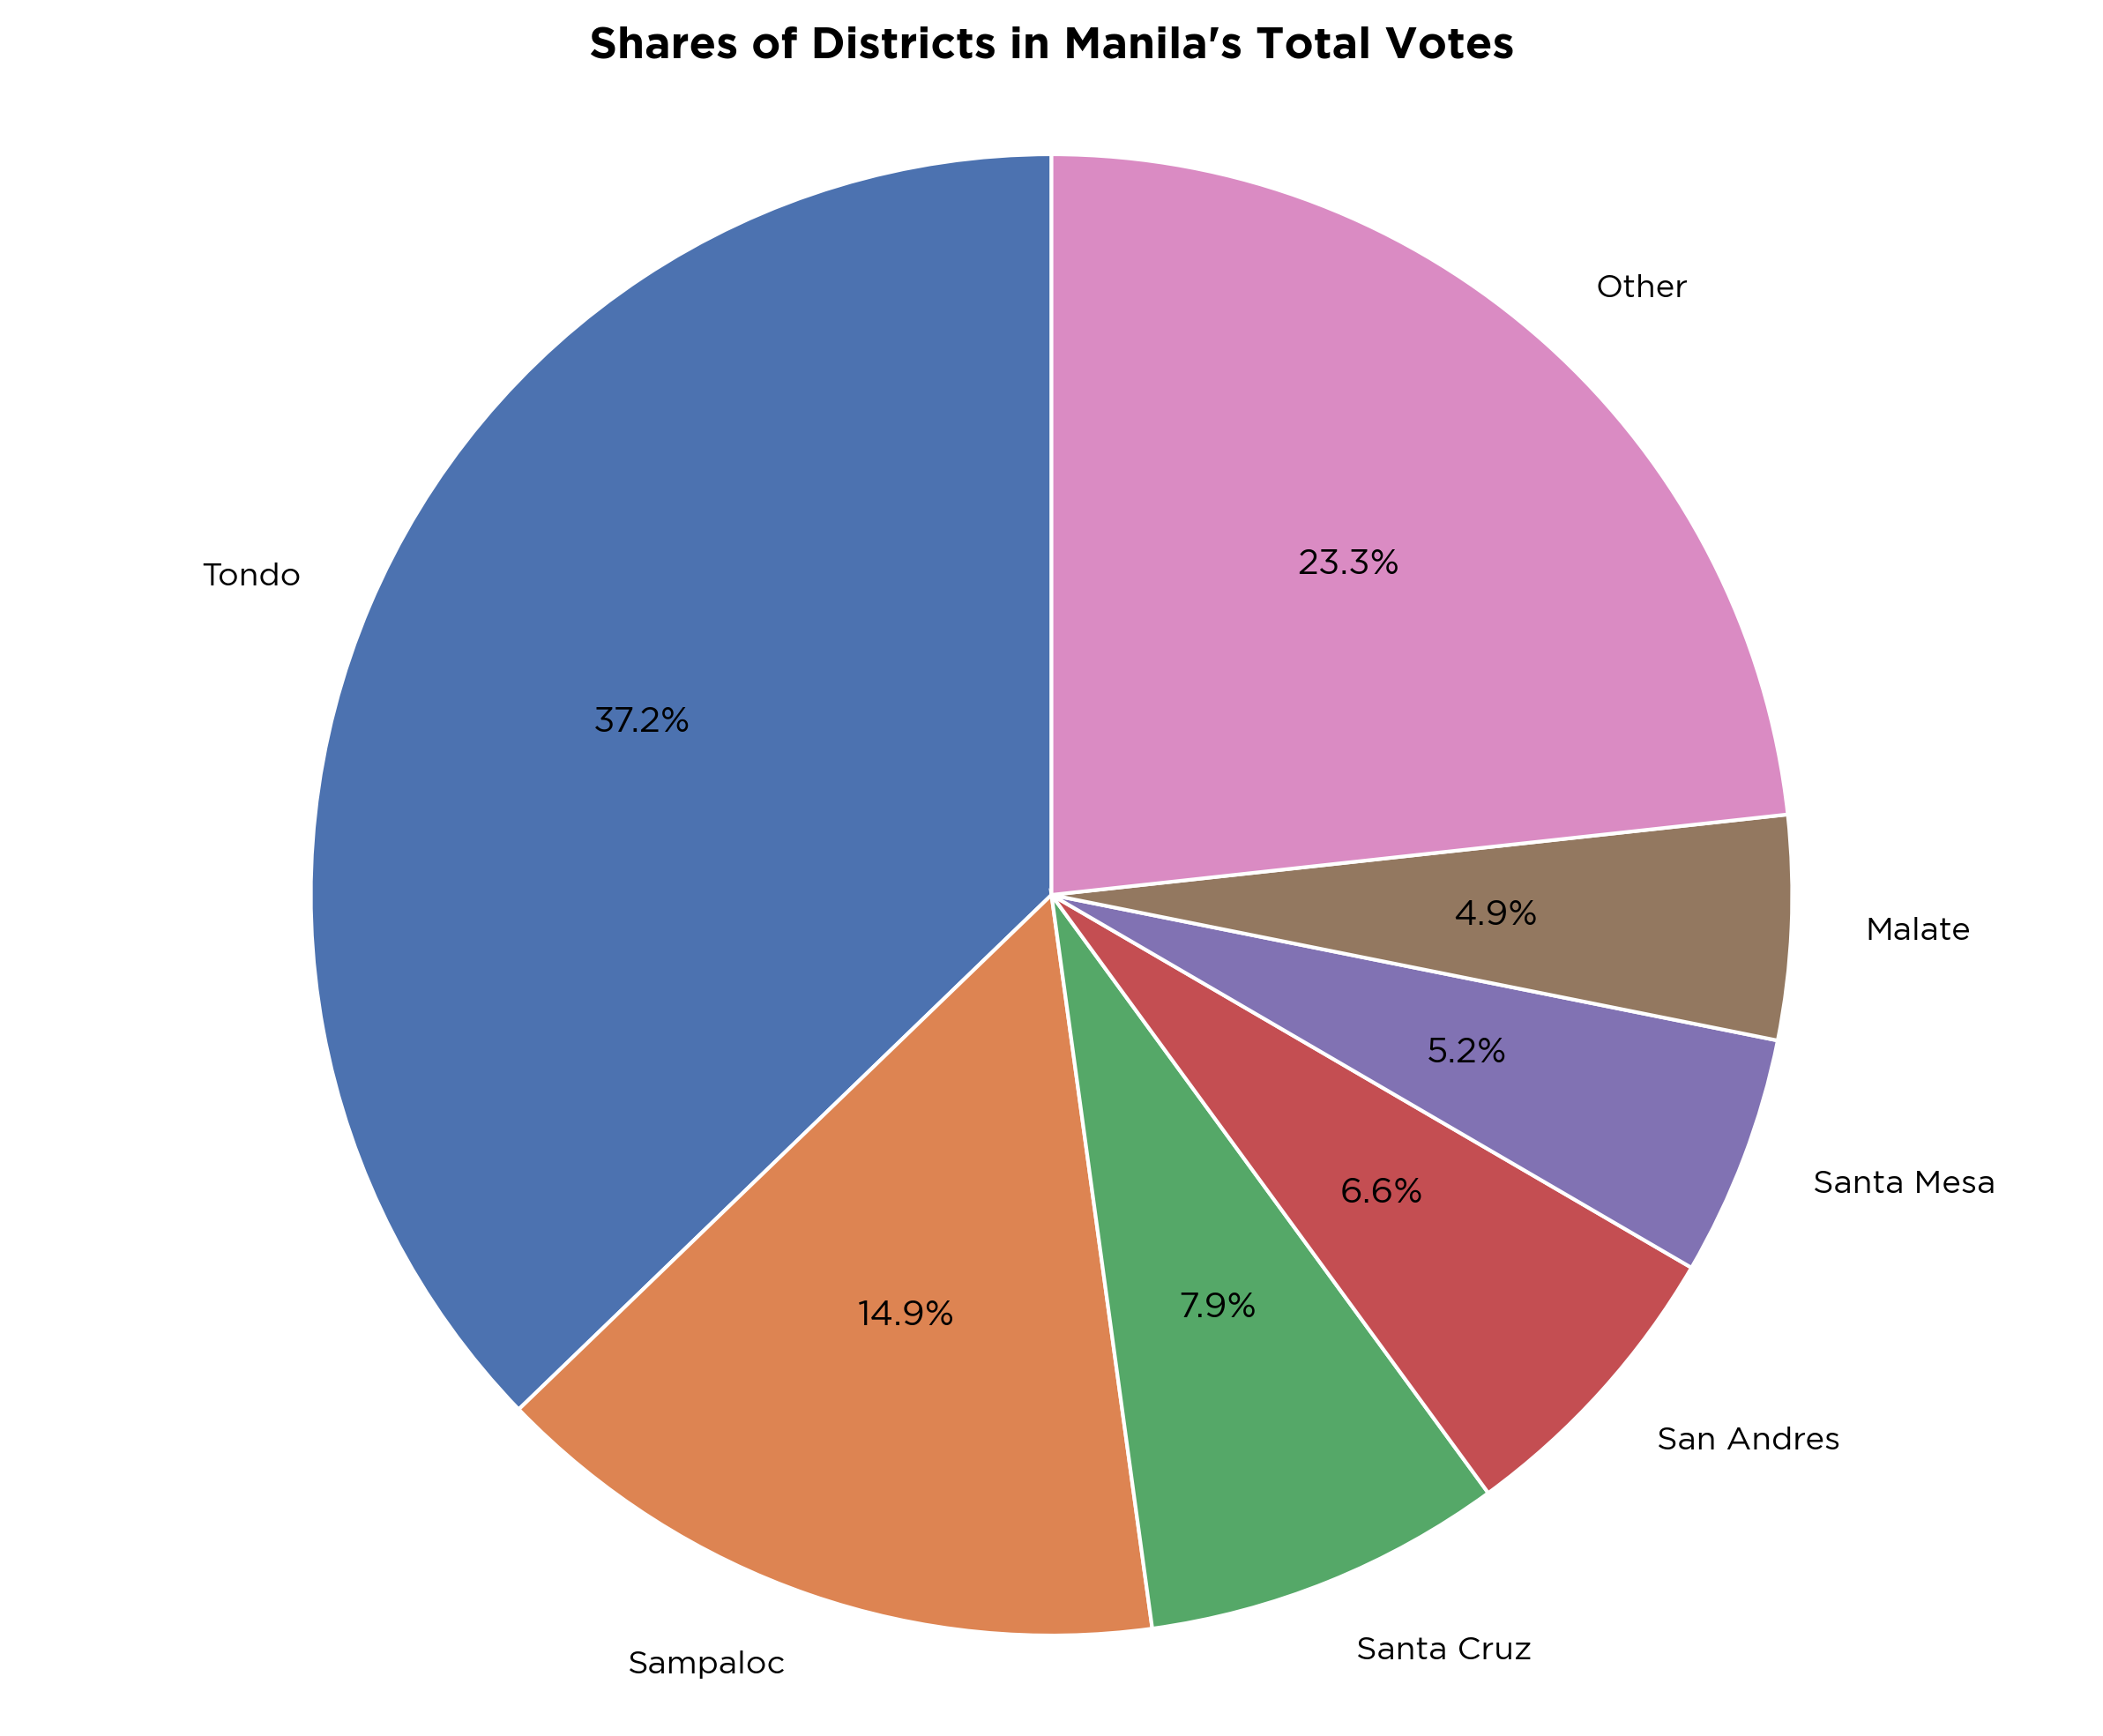

In [26]:
top_5_maniladis = df_manilacitypropergrp.nlargest(6, 'total_votes')
other_maniladis = df_manilacitypropergrp['total_votes'].sum() - top_5_maniladis['total_votes'].sum()

maniladis = pd.concat([top_5_maniladis, pd.DataFrame({'city': ['Other'], 'total_votes': [other_maniladis]})])

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(maniladis['total_votes'], labels=maniladis['city'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('deep', len(maniladis)), wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Shares of Districts in Manila\'s Total Votes', fontsize=12, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plot_path = os.path.join(plot_dir, 'manila_districts_pie.png')
plt.savefig(plot_path, dpi=600, bbox_inches='tight', pad_inches=0.125)

# Show the plot
plt.show()

#### Visualizing votes

In [27]:
df_manilacityproper.columns

Index(['Unnamed: 0', 'region', 'province', 'city', 'brgy', 'precinct',
       'total_votes', 'pres_3_domagoso', 'pres_5_lacson', 'pres_7_marcos',
       'pres_9_pacquiao', 'pres_10_robredo', 'Others'],
      dtype='object')

In [28]:
def plot_stacked_bar_chart(data, category, title, xlabel, ylabel, filename):
    categories = data[category]
    bbm_votes = data['pres_7_marcos']
    leni_votes = data['pres_10_robredo']
    isko_votes = data['pres_3_domagoso']
    pac_votes = data['pres_9_pacquiao']
    lacson_votes = data['pres_5_lacson']
    others_votes = data['Others']

    plt.figure(figsize=(12, 8))

    bar_width = 0.75

    plt.barh(categories, bbm_votes, bar_width, label='Marcos', color='maroon', linewidth=0.5, edgecolor='black')
    plt.barh(categories, leni_votes, bar_width, left=bbm_votes, label='Robredo', color='violet', linewidth=0.5, edgecolor='black')
    plt.barh(categories, isko_votes, bar_width, left=bbm_votes+leni_votes, label='Domagoso', color='royalblue', linewidth=0.5, edgecolor='black')
    plt.barh(categories, pac_votes, bar_width, left=bbm_votes+leni_votes+isko_votes, label='Pacquiao', color='orange', linewidth=0.5, edgecolor='black')
    plt.barh(categories, lacson_votes, bar_width, left=bbm_votes+leni_votes+isko_votes+pac_votes, label='Lacson', color='navy', linewidth=0.5, edgecolor='black')
    plt.barh(categories, others_votes, bar_width, left=bbm_votes+leni_votes+isko_votes+pac_votes+lacson_votes, label='Others', color='grey', linewidth=0.5, edgecolor='black')

    plt.title(title, fontsize=12, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0, ha='center')
    plt.legend(fontsize=8)

    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path, dpi=600, bbox_inches='tight', pad_inches=0.125)

    plt.show()

In [29]:
def plot_stacked_bar_chart_norm(data, category, title, xlabel, ylabel, filename):
    categories = data[category]
    total_votes = data['total_votes']
    bbm_votes = data['pres_7_marcos'] / total_votes * 100
    leni_votes = data['pres_10_robredo'] / total_votes * 100
    isko_votes = data['pres_3_domagoso'] / total_votes * 100
    pac_votes = data['pres_9_pacquiao'] / total_votes * 100
    lacson_votes = data['pres_5_lacson'] / total_votes * 100
    others_votes = data['Others'] / total_votes * 100

    plt.figure(figsize=(12, 8))

    bar_width = 0.75

    plt.barh(categories, bbm_votes, bar_width, label='Marcos', color='maroon', linewidth=0.5, edgecolor='black')
    plt.barh(categories, leni_votes, bar_width, left=bbm_votes, label='Robredo', color='violet', linewidth=0.5, edgecolor='black')
    plt.barh(categories, isko_votes, bar_width, left=bbm_votes+leni_votes, label='Domagoso', color='royalblue', linewidth=0.5, edgecolor='black')
    plt.barh(categories, pac_votes, bar_width, left=bbm_votes+leni_votes+isko_votes, label='Pacquiao', color='orange', linewidth=0.5, edgecolor='black')
    plt.barh(categories, lacson_votes, bar_width, left=bbm_votes+leni_votes+isko_votes+pac_votes, label='Lacson', color='navy', linewidth=0.5, edgecolor='black')
    plt.barh(categories, others_votes, bar_width, left=bbm_votes+leni_votes+isko_votes+pac_votes+lacson_votes, label='Others', color='grey', linewidth=0.5, edgecolor='black')

    plt.axvline(x=50, color='black', linestyle='--', linewidth=1, label='Majority indicator')

    plt.title(title, fontsize=12, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(0,100)
    plt.xticks(rotation=0, ha='center')
    plt.legend(fontsize=8, bbox_to_anchor=(1.01, 1.005), loc='upper left')

    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
    
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path, dpi=600, bbox_inches='tight', pad_inches=0.125)

    plt.show()

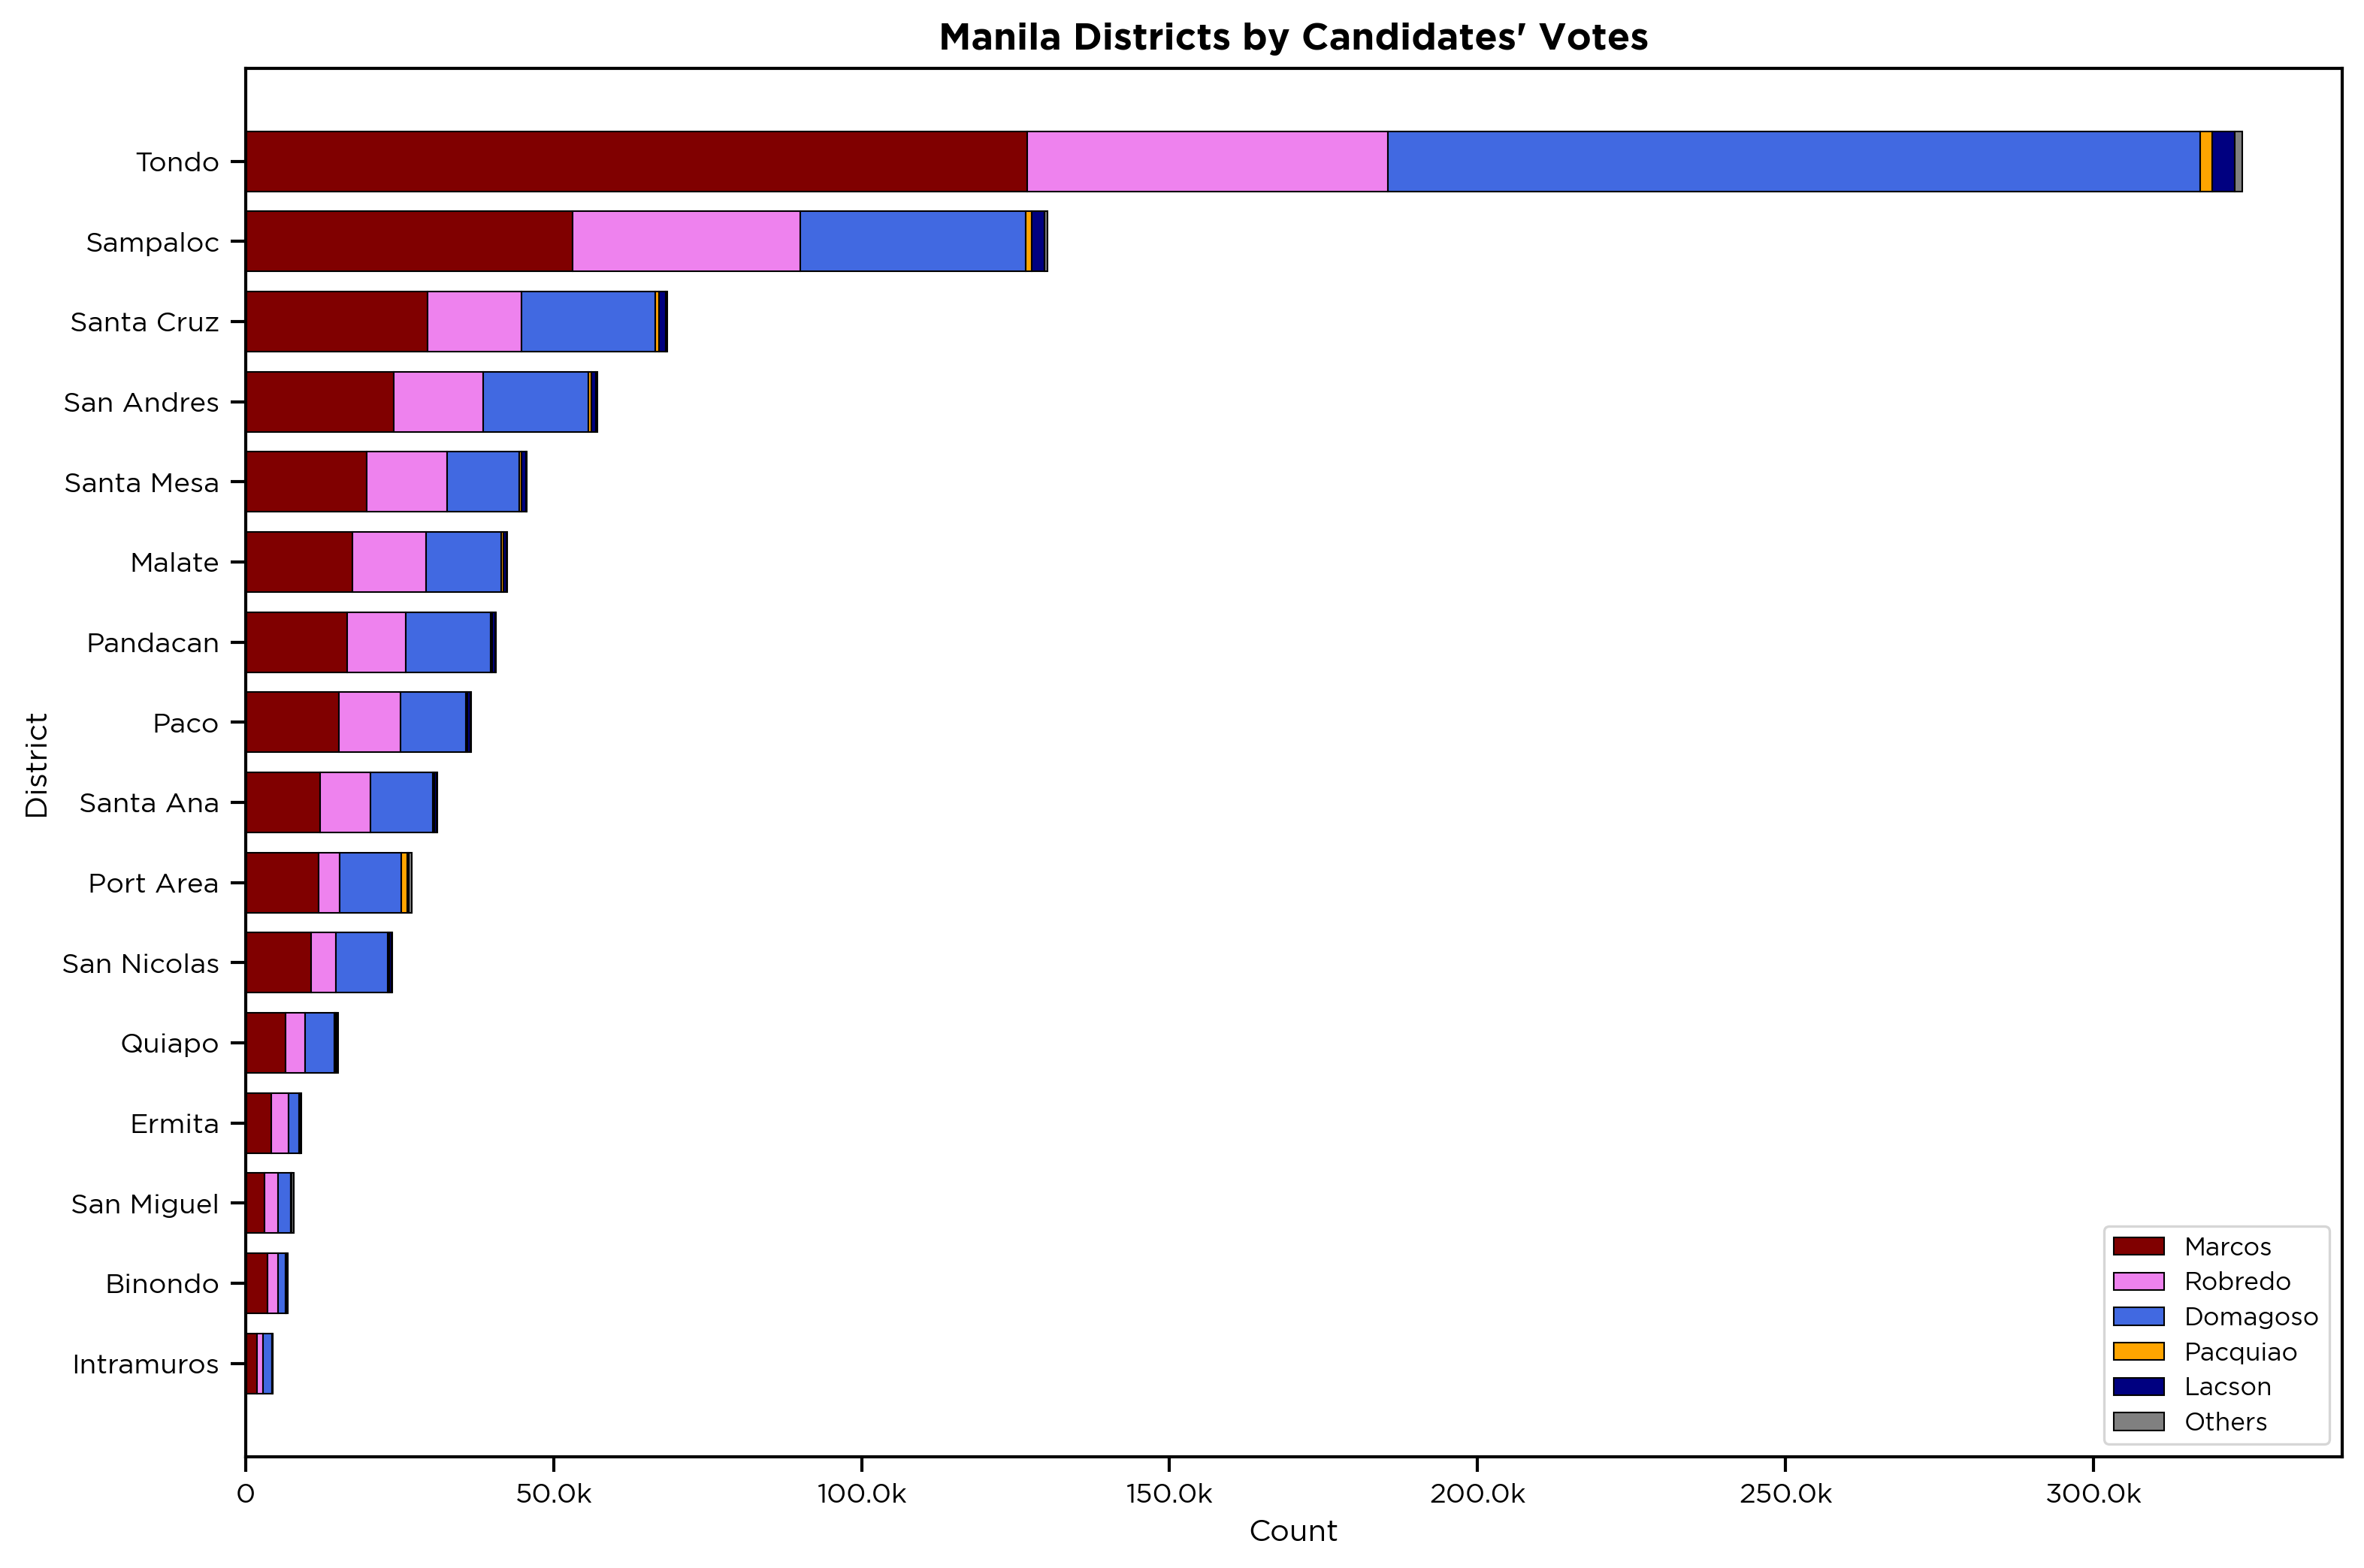

In [30]:
plot_stacked_bar_chart(df_manilacitypropergrp, 'city', 'Manila Districts by Candidates\' Votes', 'Count', 'District', 'manila_district_pres_votes_stack.png')

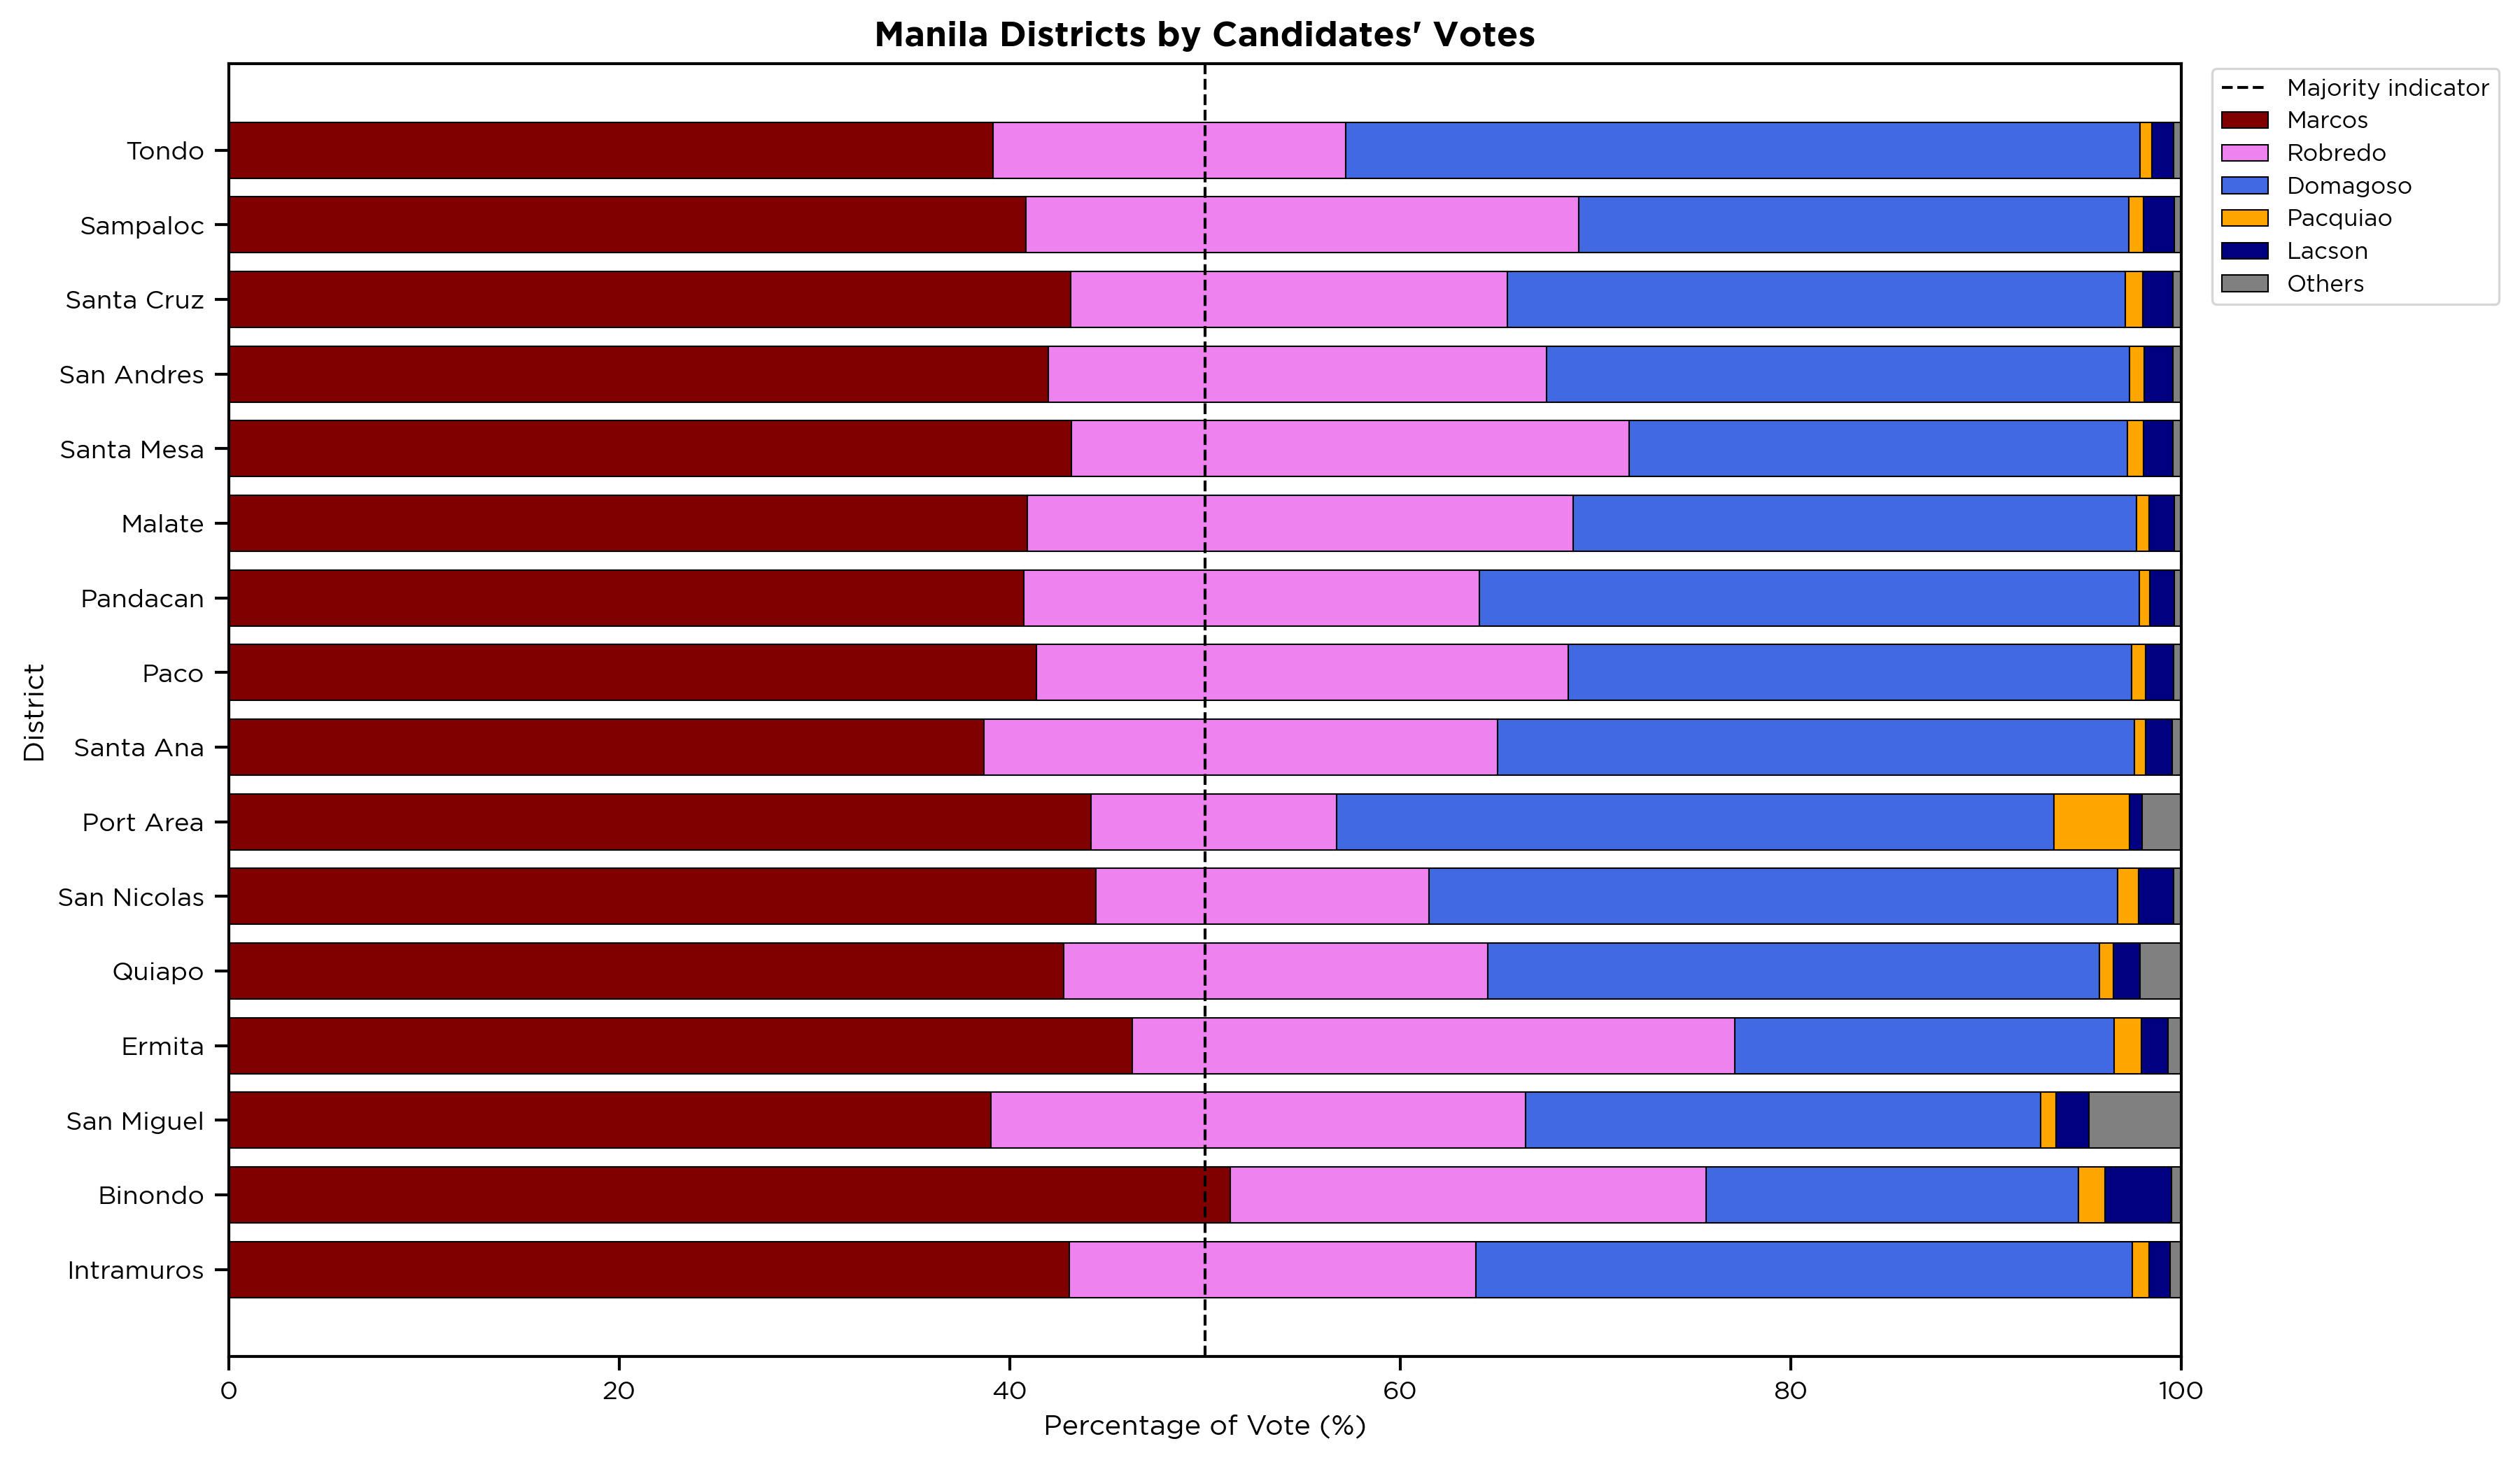

In [31]:
plot_stacked_bar_chart_norm(df_manilacitypropergrp, 'city', 'Manila Districts by Candidates\' Votes', 'Percentage of Vote (%)', 'District', 'manila_district_pres_votes_stack_norm.png')

In [32]:
def dodge_bar_chart(data, category, filename, xlabel='Votes', ylabel='District', title='Dodged Bar Chart of Votes by District'):
    # Sort the data by total votes
    data_sorted = data.sort_values(by='total_votes', ascending=True)

    # Split the data into top and bottom halves
    half_len = len(data_sorted) // 2
    top_districts = data_sorted.iloc[half_len:]
    bottom_districts = data_sorted.iloc[:half_len]

    fig, axes = plt.subplots(1, 2, figsize=(16,10))

    for ax, districts in zip(axes, [top_districts, bottom_districts]):
        categories = districts[category]
        total_votes = districts['total_votes']
        marcos_votes = districts['pres_7_marcos'] / total_votes * 100
        robredo_votes = districts['pres_10_robredo'] / total_votes * 100
        isko_votes = districts['pres_3_domagoso'] / total_votes * 100

        bar_width = 0.25  # Adjust the bar width
        bar_padding = 0.275  # Adjust the padding between bars

        center = np.arange(len(categories))

        bars1 = ax.barh(center + bar_padding, marcos_votes, bar_width, label='Marcos Jr.', color='maroon', linewidth=0.5, edgecolor='black')
        bars2 = ax.barh(center, isko_votes, bar_width, label='Domagoso', color='royalblue', linewidth=0.5, edgecolor='black')
        bars3 = ax.barh(center - bar_padding, robredo_votes, bar_width, label='Robredo', color='violet', linewidth=0.5, edgecolor='black')

        for bar1, bar2, bar3, city in zip(bars1, bars2, bars3, categories):
            ax.text(bar1.get_width() + 1, bar1.get_y() + bar1.get_height() / 2, f'{bar1.get_width():.2f}%', ha='left', va='center', fontsize=9)
            ax.text(bar2.get_width() + 1, bar2.get_y() + bar2.get_height() / 2, f'{bar2.get_width():.2f}%', ha='left', va='center', fontsize=9)
            ax.text(bar3.get_width() + 1, bar3.get_y() + bar3.get_height() / 2, f'{bar3.get_width():.2f}%', ha='left', va='center', fontsize=9)

        # Set plot title and labels
        ax.set_xlabel(xlabel + ' (%)')
        ax.set_ylabel(ylabel)
        ax.set_yticks(np.arange(len(categories)))
        ax.set_yticklabels(categories)
        ax.set_xlim(0,100)

        # Add legend
        ax.legend(title='Candidates', loc='upper right')

        # Rotate x-axis labels for better readability
        ax.tick_params(axis='x', rotation=0)

    plt.subplots_adjust(wspace=0.2)  # Change the spacing as needed

    plt.suptitle(title, fontsize=12, fontweight='bold')

    # Save the plot as an image
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path, dpi=600, bbox_inches='tight', pad_inches=0.125)

    plt.tight_layout()
    
    plt.show()

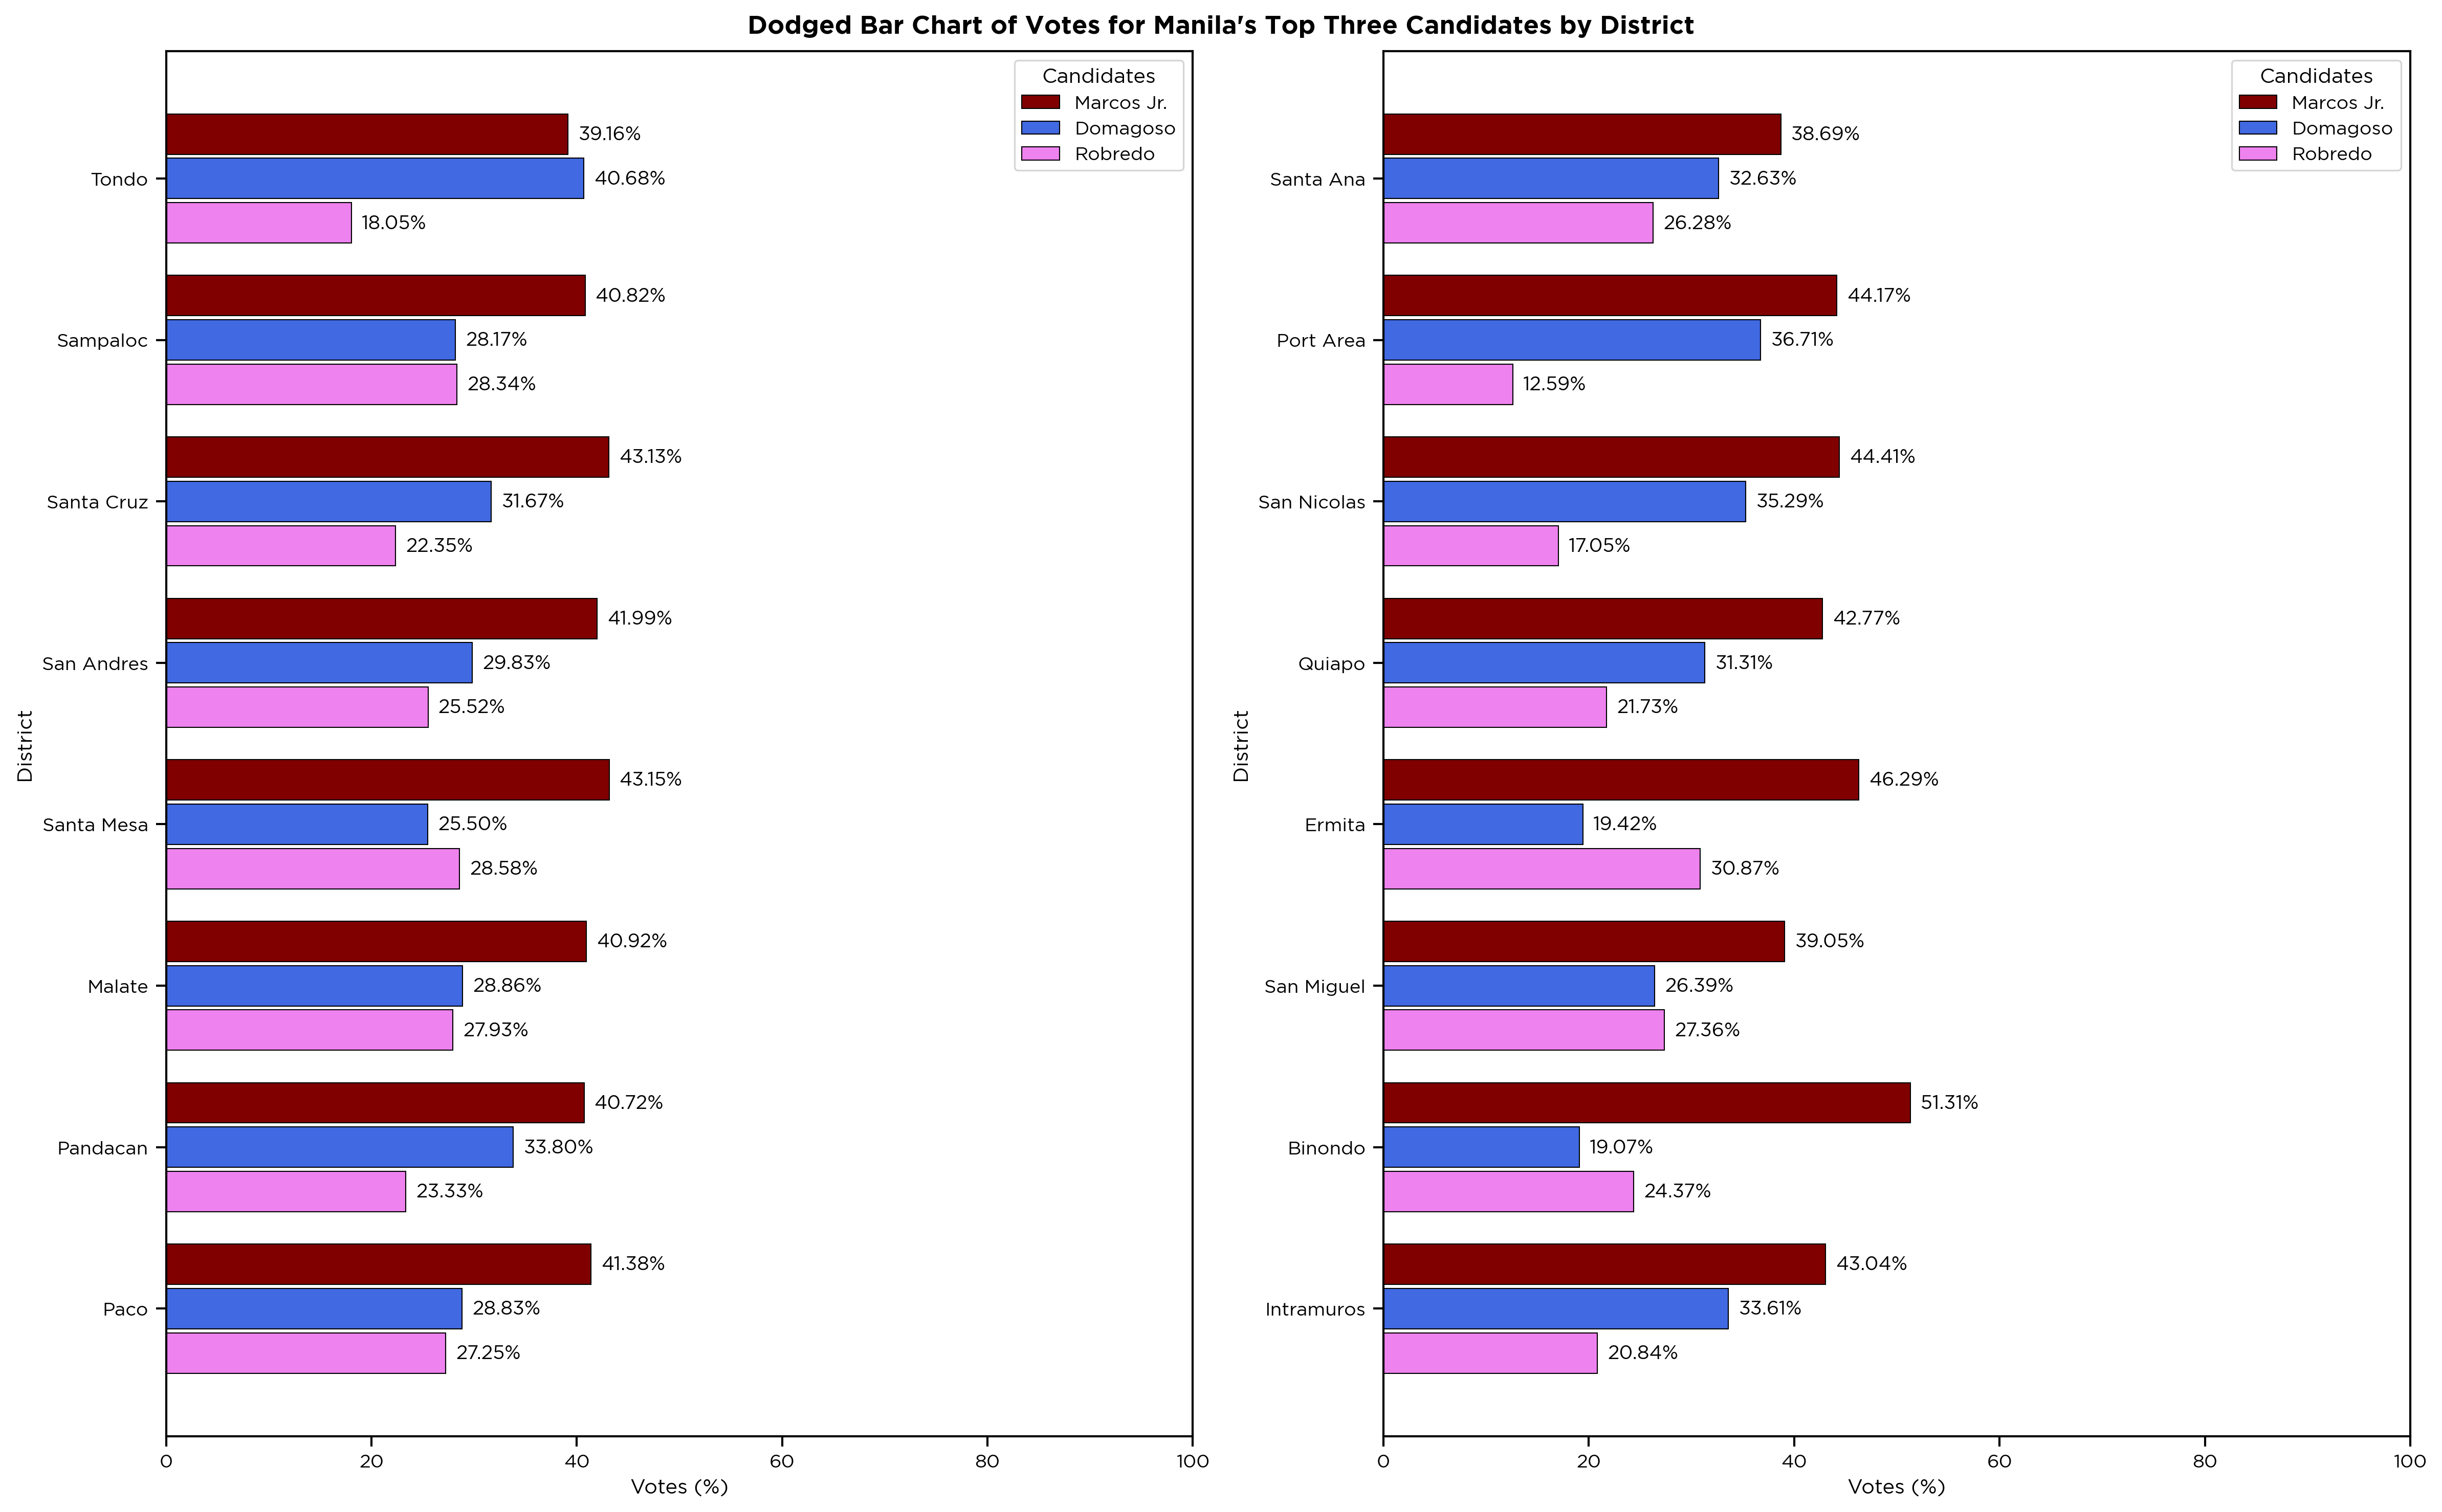

In [33]:
dodge_bar_chart(df_manilacitypropergrp, 'city', 'dodged_bar_dist_presvotes', xlabel='Votes', ylabel='District', title='Dodged Bar Chart of Votes for Manila\'s Top Three Candidates by District')

## Presidential (City of Manila)

### Setting default visualization styles

In [34]:
df_vp = pd.read_csv(r'C:\Users\Ebo\DS162\placebo_first\Project_pers_test\2022 Elections\Datasets\vp.csv')

### Data wrangling: Presidential votes data

In [35]:
df_vp['region'].unique()

array(['BARMM', 'CORDILLERA ADMINISTRATIVE REGION',
       'NATIONAL CAPITAL REGION', 'OAV', 'REGION I', 'REGION II',
       'REGION III', 'REGION IV-A', 'REGION IV-B', 'REGION IX',
       'REGION V', 'REGION VI', 'REGION VII', 'REGION VIII', 'REGION X',
       'REGION XI', 'REGION XII', 'REGION XIII'], dtype=object)

In [36]:
df_vp.columns

Index(['Unnamed: 0', 'region', 'province', 'city', 'brgy', 'precinct',
       'total_votes', 'vp_1_atienza', 'vp_2_bello', 'vp_3_david',
       'vp_4_duterte', 'vp_5_lopez', 'vp_6_ong', 'vp_7_pangilinan',
       'vp_8_serapio', 'vp_9_sotto'],
      dtype='object')

In [37]:
df_vp['region'].unique()

array(['BARMM', 'CORDILLERA ADMINISTRATIVE REGION',
       'NATIONAL CAPITAL REGION', 'OAV', 'REGION I', 'REGION II',
       'REGION III', 'REGION IV-A', 'REGION IV-B', 'REGION IX',
       'REGION V', 'REGION VI', 'REGION VII', 'REGION VIII', 'REGION X',
       'REGION XI', 'REGION XII', 'REGION XIII'], dtype=object)

In [38]:
df_vp['province'].unique()

array(['BASILAN', 'LANAO DEL SUR', 'MAGUINDANAO', 'SULU', 'TAWI-TAWI',
       'ABRA', 'APAYAO', 'BENGUET', 'IFUGAO', 'KALINGA',
       'MOUNTAIN PROVINCE', 'NCR - FOURTH DISTRICT', 'NCR - MANILA',
       'NCR - SECOND DISTRICT', 'NCR - THIRD DISTRICT',
       'TAGUIG - PATEROS', 'AMERICAS', 'ASIA PACIFIC', 'EUROPE',
       'MIDDLE EAST AND AFRICAS', 'ILOCOS NORTE', 'ILOCOS SUR',
       'LA UNION', 'PANGASINAN', 'BATANES', 'CAGAYAN', 'ISABELA',
       'NUEVA VIZCAYA', 'QUIRINO', 'AURORA', 'BATAAN', 'BULACAN',
       'NUEVA ECIJA', 'PAMPANGA', 'TARLAC', 'ZAMBALES', 'BATANGAS',
       'CAVITE', 'LAGUNA', 'QUEZON', 'RIZAL', 'MARINDUQUE',
       'OCCIDENTAL MINDORO', 'ORIENTAL MINDORO', 'PALAWAN', 'ROMBLON',
       'ZAMBOANGA DEL NORTE', 'ZAMBOANGA DEL SUR', 'ZAMBOANGA SIBUGAY',
       'ALBAY', 'CAMARINES NORTE', 'CAMARINES SUR', 'CATANDUANES',
       'MASBATE', 'SORSOGON', 'AKLAN', 'ANTIQUE', 'CAPIZ', 'GUIMARAS',
       'ILOILO', 'NEGROS OCCIDENTAL', 'BOHOL', 'CEBU', 'NEGROS ORIENTAL',
   

In [39]:
# Replace all names in the provinces

reg_dict = {
    'BARMM': 'Bangsamoro',
    'CORDILLERA ADMINISTRATIVE REGION': 'Cordillera',
    'NATIONAL CAPITAL REGION': 'Metro Manila',
    'OAV': 'Overseas',
    'REGION I': 'Ilocos',
    'REGION II': 'Cagayan Valley',
    'REGION III': 'Central Luzon',
    'REGION IV-A': 'CALABARZON',
    'REGION IV-B': 'MIMAROPA',
    'REGION IX': 'Zamboanga Peninsula',
    'REGION V': 'Bicol',
    'REGION VI': 'Western Visayas',
    'REGION VII': 'Central Visayas',
    'REGION VIII': 'Eastern Visayas',
    'REGION X': 'Northern Mindanao',
    'REGION XI': 'Davao', 
    'REGION XII': 'SOCCSKSARGEN',
    'REGION XIII': 'Caraga'
}

df_vp['region'] = df_vp['region'].replace(reg_dict)

In [40]:
prov_dict = {
    'NCR - FOURTH DISTRICT': 'NCR-South',
    'NCR - MANILA': 'NCR-Manila',
    'NCR - SECOND DISTRICT': 'NCR-East',
    'NCR - THIRD DISTRICT': 'NCR-North',
    'TAGUIG - PATEROS': 'NCR-South'
}

df_vp['province'] = df_vp['province'].replace(prov_dict).fillna(df_vp['province'])

In [41]:
other_prov_dict = {
    'BASILAN': 'Basilan',
    'LANAO DEL SUR': 'Lanao del Sur',
    'MAGUINDANAO': 'Maguindanao',
    'SULU': 'Sulu',
    'TAWI-TAWI': 'Tawi-Tawi',
    'ABRA': 'Abra',
    'APAYAO': 'Apayao',
    'BENGUET': 'Benguet',
    'IFUGAO': 'Ifugao',
    'KALINGA': 'Kalinga',
    'MOUNTAIN PROVINCE': 'Mountain Province',
    'AMERICAS': 'Americas',
    'ASIA PACIFIC': 'Asia Pacific',
    'EUROPE': 'Europe',
    'MIDDLE EAST AND AFRICAS': 'Middle East and Africas',
    'ILOCOS NORTE': 'Ilocos Norte',
    'ILOCOS SUR': 'Ilocos Sur',
    'LA UNION': 'La Union',
    'PANGASINAN': 'Pangasinan',
    'BATANES': 'Batanes',
    'CAGAYAN': 'Cagayan',
    'ISABELA': 'Isabela',
    'NUEVA VIZCAYA': 'Nueva Vizcaya',
    'QUIRINO': 'Quirino',
    'AURORA': 'Aurora',
    'BATAAN': 'Bataan',
    'BULACAN': 'Bulacan',
    'NUEVA ECIJA': 'Nueva Ecija',
    'PAMPANGA': 'Pampanga',
    'TARLAC': 'Tarlac',
    'ZAMBALES': 'Zambales',
    'BATANGAS': 'Batangas',
    'CAVITE': 'Cavite',
    'LAGUNA': 'Laguna',
    'QUEZON': 'Quezon',
    'RIZAL': 'Rizal',
    'MARINDUQUE': 'Marinduque',
    'OCCIDENTAL MINDORO': 'Occidental Mindoro',
    'ORIENTAL MINDORO': 'Oriental Mindoro',
    'PALAWAN': 'Palawan',
    'ROMBLON': 'Romblon',
    'ZAMBOANGA DEL NORTE': 'Zamboanga del Norte',
    'ZAMBOANGA DEL SUR': 'Zamboanga del Sur',
    'ZAMBOANGA SIBUGAY': 'Zamboanga Sibugay',
    'ALBAY': 'Albay',
    'CAMARINES NORTE': 'Camarines Norte',
    'CAMARINES SUR': 'Camarines Sur',
    'CATANDUANES': 'Catanduanes',
    'MASBATE': 'Masbate',
    'SORSOGON': 'Sorsogon',
    'AKLAN': 'Aklan',
    'ANTIQUE': 'Antique',
    'CAPIZ': 'Capiz',
    'GUIMARAS': 'Guimaras',
    'ILOILO': 'Iloilo',
    'NEGROS OCCIDENTAL': 'Negros Occidental',
    'BOHOL': 'Bohol',
    'CEBU': 'Cebu',
    'NEGROS ORIENTAL': 'Negros Oriental',
    'SIQUIJOR': 'Siquijor',
    'BILIRAN': 'Biliran',
    'EASTERN SAMAR': 'Eastern Samar',
    'LEYTE': 'Leyte',
    'NORTHERN SAMAR': 'Northern Samar',
    'SAMAR': 'Samar',
    'SOUTHERN LEYTE': 'Southern Leyte',
    'BUKIDNON': 'Bukidnon',
    'CAMIGUIN': 'Camiguin',
    'LANAO DEL NORTE': 'Lanao del Norte',
    'MISAMIS OCCIDENTAL': 'Misamis Occidental',
    'MISAMIS ORIENTAL': 'Misamis Oriental',
    'DAVAO DE ORO': 'Davao de Oro',
    'DAVAO DEL NORTE': 'Davao del Norte',
    'DAVAO DEL SUR': 'Davao del Sur',
    'DAVAO OCCIDENTAL': 'Davao Occidental',
    'DAVAO ORIENTAL': 'Davao Oriental',
    'COTABATO': 'Cotabato',
    'SARANGANI': 'Sarangani',
    'SOUTH COTABATO': 'South Cotabato',
    'SULTAN KUDARAT': 'Sultan Kudarat',
    'AGUSAN DEL NORTE': 'Agusan del Norte',
    'AGUSAN DEL SUR': 'Agusan del Sur',
    'DINAGAT ISLANDS': 'Dinagat Islands',
    'SURIGAO DEL NORTE': 'Surigao del Norte',
    'SURIGAO DEL SUR': 'Surigao del Sur'
}

df_vp['province'] = df_vp['province'].replace(other_prov_dict).fillna(df_vp['province'])

In [42]:
# Remove cities' caps lock names and replace with proper noun names
def capitalize_municipio(city):
    articles = ['de', 'del', 'dela']
    words = city.split()
    capitalized_words = []
    for word in words:
        if word.lower() == "d'o":
            capitalized_words.append("D'O")
        elif word.lower() == "d'a":
            capitalized_words.append("D'A")
        else:
            if word.lower().startswith("d'"):
                word = "D'" + word[2:].capitalize()
            else:
                word = word.capitalize() if word.lower() not in articles else word.lower()
            capitalized_words.append(word)
    return ' '.join(capitalized_words)

df_vp['city'] = df_vp['city'].apply(capitalize_municipio)
df_vp['brgy'] = df_vp['brgy'].apply(capitalize_municipio)

In [43]:
df_vp.columns

Index(['Unnamed: 0', 'region', 'province', 'city', 'brgy', 'precinct',
       'total_votes', 'vp_1_atienza', 'vp_2_bello', 'vp_3_david',
       'vp_4_duterte', 'vp_5_lopez', 'vp_6_ong', 'vp_7_pangilinan',
       'vp_8_serapio', 'vp_9_sotto'],
      dtype='object')

In [44]:
cols_to_combine = ['vp_1_atienza', 'vp_2_bello', 'vp_3_david', 'vp_5_lopez', 'vp_8_serapio']

# Sum the values across the columns axis to create the 'Others' column
df_vp['Others'] = df_vp[cols_to_combine].sum(axis=1)

# Drop the original columns
df_vp.drop(columns=cols_to_combine, inplace=True)

In [45]:
df_vp['province'].unique()

array(['Basilan', 'Lanao del Sur', 'Maguindanao', 'Sulu', 'Tawi-Tawi',
       'Abra', 'Apayao', 'Benguet', 'Ifugao', 'Kalinga',
       'Mountain Province', 'NCR-South', 'NCR-Manila', 'NCR-East',
       'NCR-North', 'Americas', 'Asia Pacific', 'Europe',
       'Middle East and Africas', 'Ilocos Norte', 'Ilocos Sur',
       'La Union', 'Pangasinan', 'Batanes', 'Cagayan', 'Isabela',
       'Nueva Vizcaya', 'Quirino', 'Aurora', 'Bataan', 'Bulacan',
       'Nueva Ecija', 'Pampanga', 'Tarlac', 'Zambales', 'Batangas',
       'Cavite', 'Laguna', 'Quezon', 'Rizal', 'Marinduque',
       'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Romblon',
       'Zamboanga del Norte', 'Zamboanga del Sur', 'Zamboanga Sibugay',
       'Albay', 'Camarines Norte', 'Camarines Sur', 'Catanduanes',
       'Masbate', 'Sorsogon', 'Aklan', 'Antique', 'Capiz', 'Guimaras',
       'Iloilo', 'Negros Occidental', 'Bohol', 'Cebu', 'Negros Oriental',
       'Siquijor', 'Biliran', 'Eastern Samar', 'Leyte', 'Northern Sa

In [46]:
# # Manila's districts were listed as it is, not as a whole city
# # Map the listed districts to the city
# # List of Manila's 16 districts: Binondo, Ermita, Intramuros, Malate, Paco, Pandacan, Port Area, Quiapo, Sampaloc, San Andres, San Miguel, San Nicolas, Santa Ana, Santa Cruz, Santa Mesa, Tondo

# manila_map = {
#     'Binondo': 'Manila',
#     'Ermita': 'Manila',
#     'Intramuros': 'Manila',
#     'Malate': 'Manila',
#     'Paco': 'Manila',
#     'Pandacan': 'Manila',
#     'Port Area': 'Manila',
#     'Quiapo': 'Manila',
#     'Sampaloc': 'Manila',
#     'San Andres': 'Manila',
#     'San Miguel': 'Manila',
#     'San Nicolas': 'Manila',
#     'Santa Ana': 'Manila',
#     'Santa Cruz': 'Manila',
#     'Santa Mesa': 'Manila',
#     'Tondo': 'Manila'
# }

# df_pres['city'] = df_pres['city'].replace(manila_map)

### Visualizing Votes within the City of Manila

In the dataset, votes representing the city of Manila are not counted as one, but rather of its districts.

There are also 14 districts listed, but we will extend it into 16 to add Santa Mesa and San Andres, which are originally grouped into Sampaloc and Santa Ana, respectively.

In [47]:
df_manilacityproper_vp = df_vp[(df_vp['region'] == 'Metro Manila') & (df_vp['province'] == 'NCR-Manila')].reset_index(drop=True).sort_values(by='brgy', ascending=True).copy()

In [48]:
df_manilacityproper_vp['brgy'].unique()

array(['Barangay 1', 'Barangay 100', 'Barangay 101', 'Barangay 102',
       'Barangay 103', 'Barangay 104', 'Barangay 105', 'Barangay 106',
       'Barangay 107', 'Barangay 108', 'Barangay 109', 'Barangay 11',
       'Barangay 110', 'Barangay 111', 'Barangay 112', 'Barangay 116',
       'Barangay 117', 'Barangay 118', 'Barangay 119', 'Barangay 12',
       'Barangay 120', 'Barangay 121', 'Barangay 122', 'Barangay 123',
       'Barangay 124', 'Barangay 125', 'Barangay 126', 'Barangay 127',
       'Barangay 128', 'Barangay 129', 'Barangay 13', 'Barangay 130',
       'Barangay 131', 'Barangay 132', 'Barangay 133', 'Barangay 134',
       'Barangay 135', 'Barangay 136', 'Barangay 137', 'Barangay 138',
       'Barangay 139', 'Barangay 14', 'Barangay 140', 'Barangay 141',
       'Barangay 142', 'Barangay 143', 'Barangay 144', 'Barangay 145',
       'Barangay 146', 'Barangay 147', 'Barangay 148', 'Barangay 149',
       'Barangay 15', 'Barangay 150', 'Barangay 151', 'Barangay 152',
       'Baran

In [49]:
# The following are the barangays under the district of Santa Mesa (587-636, incl. 587-A) and San Andres (745-808, incl. 818-A)

# Define the barangay to Santa Mesa mapping
barangay_map = {f'Barangay {i}': 'Santa Mesa' for i in range(587, 637)}
barangay_map.update({f'Barangay {i}': 'San Andres' for i in range(745, 809)})
barangay_map['Barangay 587-a'] = 'Santa Mesa'
barangay_map['Barangay 818-a'] = 'San Andres'

df_manilacityproper_vp['city'] = df_manilacityproper_vp.apply(
    lambda row: barangay_map.get(row['brgy'], row['city']), axis=1)

df_manilacityproper_vp[df_manilacityproper_vp['city'].isin(['Sampaloc', 'Santa Mesa', 'San Andres'])]

,Unnamed: 0,region,province,city,brgy,precinct,total_votes,vp_4_duterte,vp_6_ong,vp_7_pangilinan,vp_9_sotto,Others
390,9008,Metro Manila,NCR-Manila,Sampaloc,Barangay 395,39060923,329,180,52,41,50,6
389,9007,Metro Manila,NCR-Manila,Sampaloc,Barangay 395,39060922,300,143,62,38,50,7
391,9009,Metro Manila,NCR-Manila,Sampaloc,Barangay 396,39060924,546,260,88,149,45,4
393,9011,Metro Manila,NCR-Manila,Sampaloc,Barangay 397,39060926,253,104,24,95,27,3
392,9010,Metro Manila,NCR-Manila,Sampaloc,Barangay 397,39060925,379,154,57,140,26,2
...,...,...,...,...,...,...,...,...,...,...,...,...
960,9578,Metro Manila,NCR-Manila,San Andres,Barangay 807,39141534,302,154,41,63,33,11
959,9577,Metro Manila,NCR-Manila,San Andres,Barangay 807,39141533,414,163,64,97,67,23
961,9579,Metro Manila,NCR-Manila,San Andres,Barangay 808,39141535,612,302,99,138,64,9
963,9581,Metro Manila,NCR-Manila,San Andres,Barangay 818-a,39141555,326,144,57,48,73,4


In [50]:
df_manilacityproper_vp

,Unnamed: 0,region,province,city,brgy,precinct,total_votes,vp_4_duterte,vp_6_ong,vp_7_pangilinan,vp_9_sotto,Others
1831,10449,Metro Manila,NCR-Manila,Tondo,Barangay 1,39010003,412,186,54,72,84,16
1829,10447,Metro Manila,NCR-Manila,Tondo,Barangay 1,39010001,436,205,63,99,61,8
1830,10448,Metro Manila,NCR-Manila,Tondo,Barangay 1,39010002,406,201,63,62,71,9
1202,9820,Metro Manila,NCR-Manila,Tondo,Barangay 100,39010248,586,296,112,64,107,7
1203,9821,Metro Manila,NCR-Manila,Tondo,Barangay 100,39010249,551,273,109,65,97,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1824,10442,Metro Manila,NCR-Manila,Tondo,Barangay 97,39010243,620,240,138,98,133,11
1823,10441,Metro Manila,NCR-Manila,Tondo,Barangay 97,39010242,613,251,153,98,99,12
1826,10444,Metro Manila,NCR-Manila,Tondo,Barangay 98,39010245,656,298,143,90,112,13
1827,10445,Metro Manila,NCR-Manila,Tondo,Barangay 99,39010246,394,214,66,60,50,4


In [51]:
df_manilacityproper_vp['city'].unique()

array(['Tondo', 'San Nicolas', 'Binondo', 'Santa Cruz', 'Quiapo',
       'Sampaloc', 'Santa Mesa', 'San Miguel', 'Port Area', 'Intramuros',
       'Ermita', 'Paco', 'Malate', 'San Andres', 'Pandacan', 'Santa Ana'],
      dtype=object)

In [52]:
numerical_cols = ['total_votes', 'vp_4_duterte', 'vp_6_ong',
                  'vp_7_pangilinan', 'vp_9_sotto', 'Others']

In [53]:
df_manilacityproper_vpgrp = df_manilacityproper_vp.groupby('city')[numerical_cols].sum().reset_index().sort_values(by='total_votes', ascending=True).reset_index(drop=True)

In [54]:
df_manilacityproper_vpgrp

,city,total_votes,vp_4_duterte,vp_6_ong,vp_7_pangilinan,vp_9_sotto,Others
0,Intramuros,4352,2153,670,666,726,137
1,Binondo,6872,3708,1001,1239,844,80
2,San Miguel,7798,3982,1187,1569,933,127
3,Ermita,8963,4451,936,2192,1195,189
4,Quiapo,14900,7231,2658,2354,2448,209
5,San Nicolas,23594,11484,4505,2941,4300,364
6,Port Area,26405,14971,3522,2058,4886,968
7,Santa Ana,30968,14198,5676,6243,4482,369
8,Paco,36378,17033,6100,7741,4985,519
9,Pandacan,40371,18783,7497,7080,6450,561


In [55]:
def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x * 1e-9:.1f}b'
    elif x >= 1e6:
        return f'{x * 1e-6:.1f}m'
    elif x >= 1e3:
        return f'{x * 1e-3:.1f}k'
    else:
        return f'{x:.0f}'

In [56]:
folder_path = r"C:\Users\Ebo\DS162\Data-Man\2022 Elections (GMA data)"

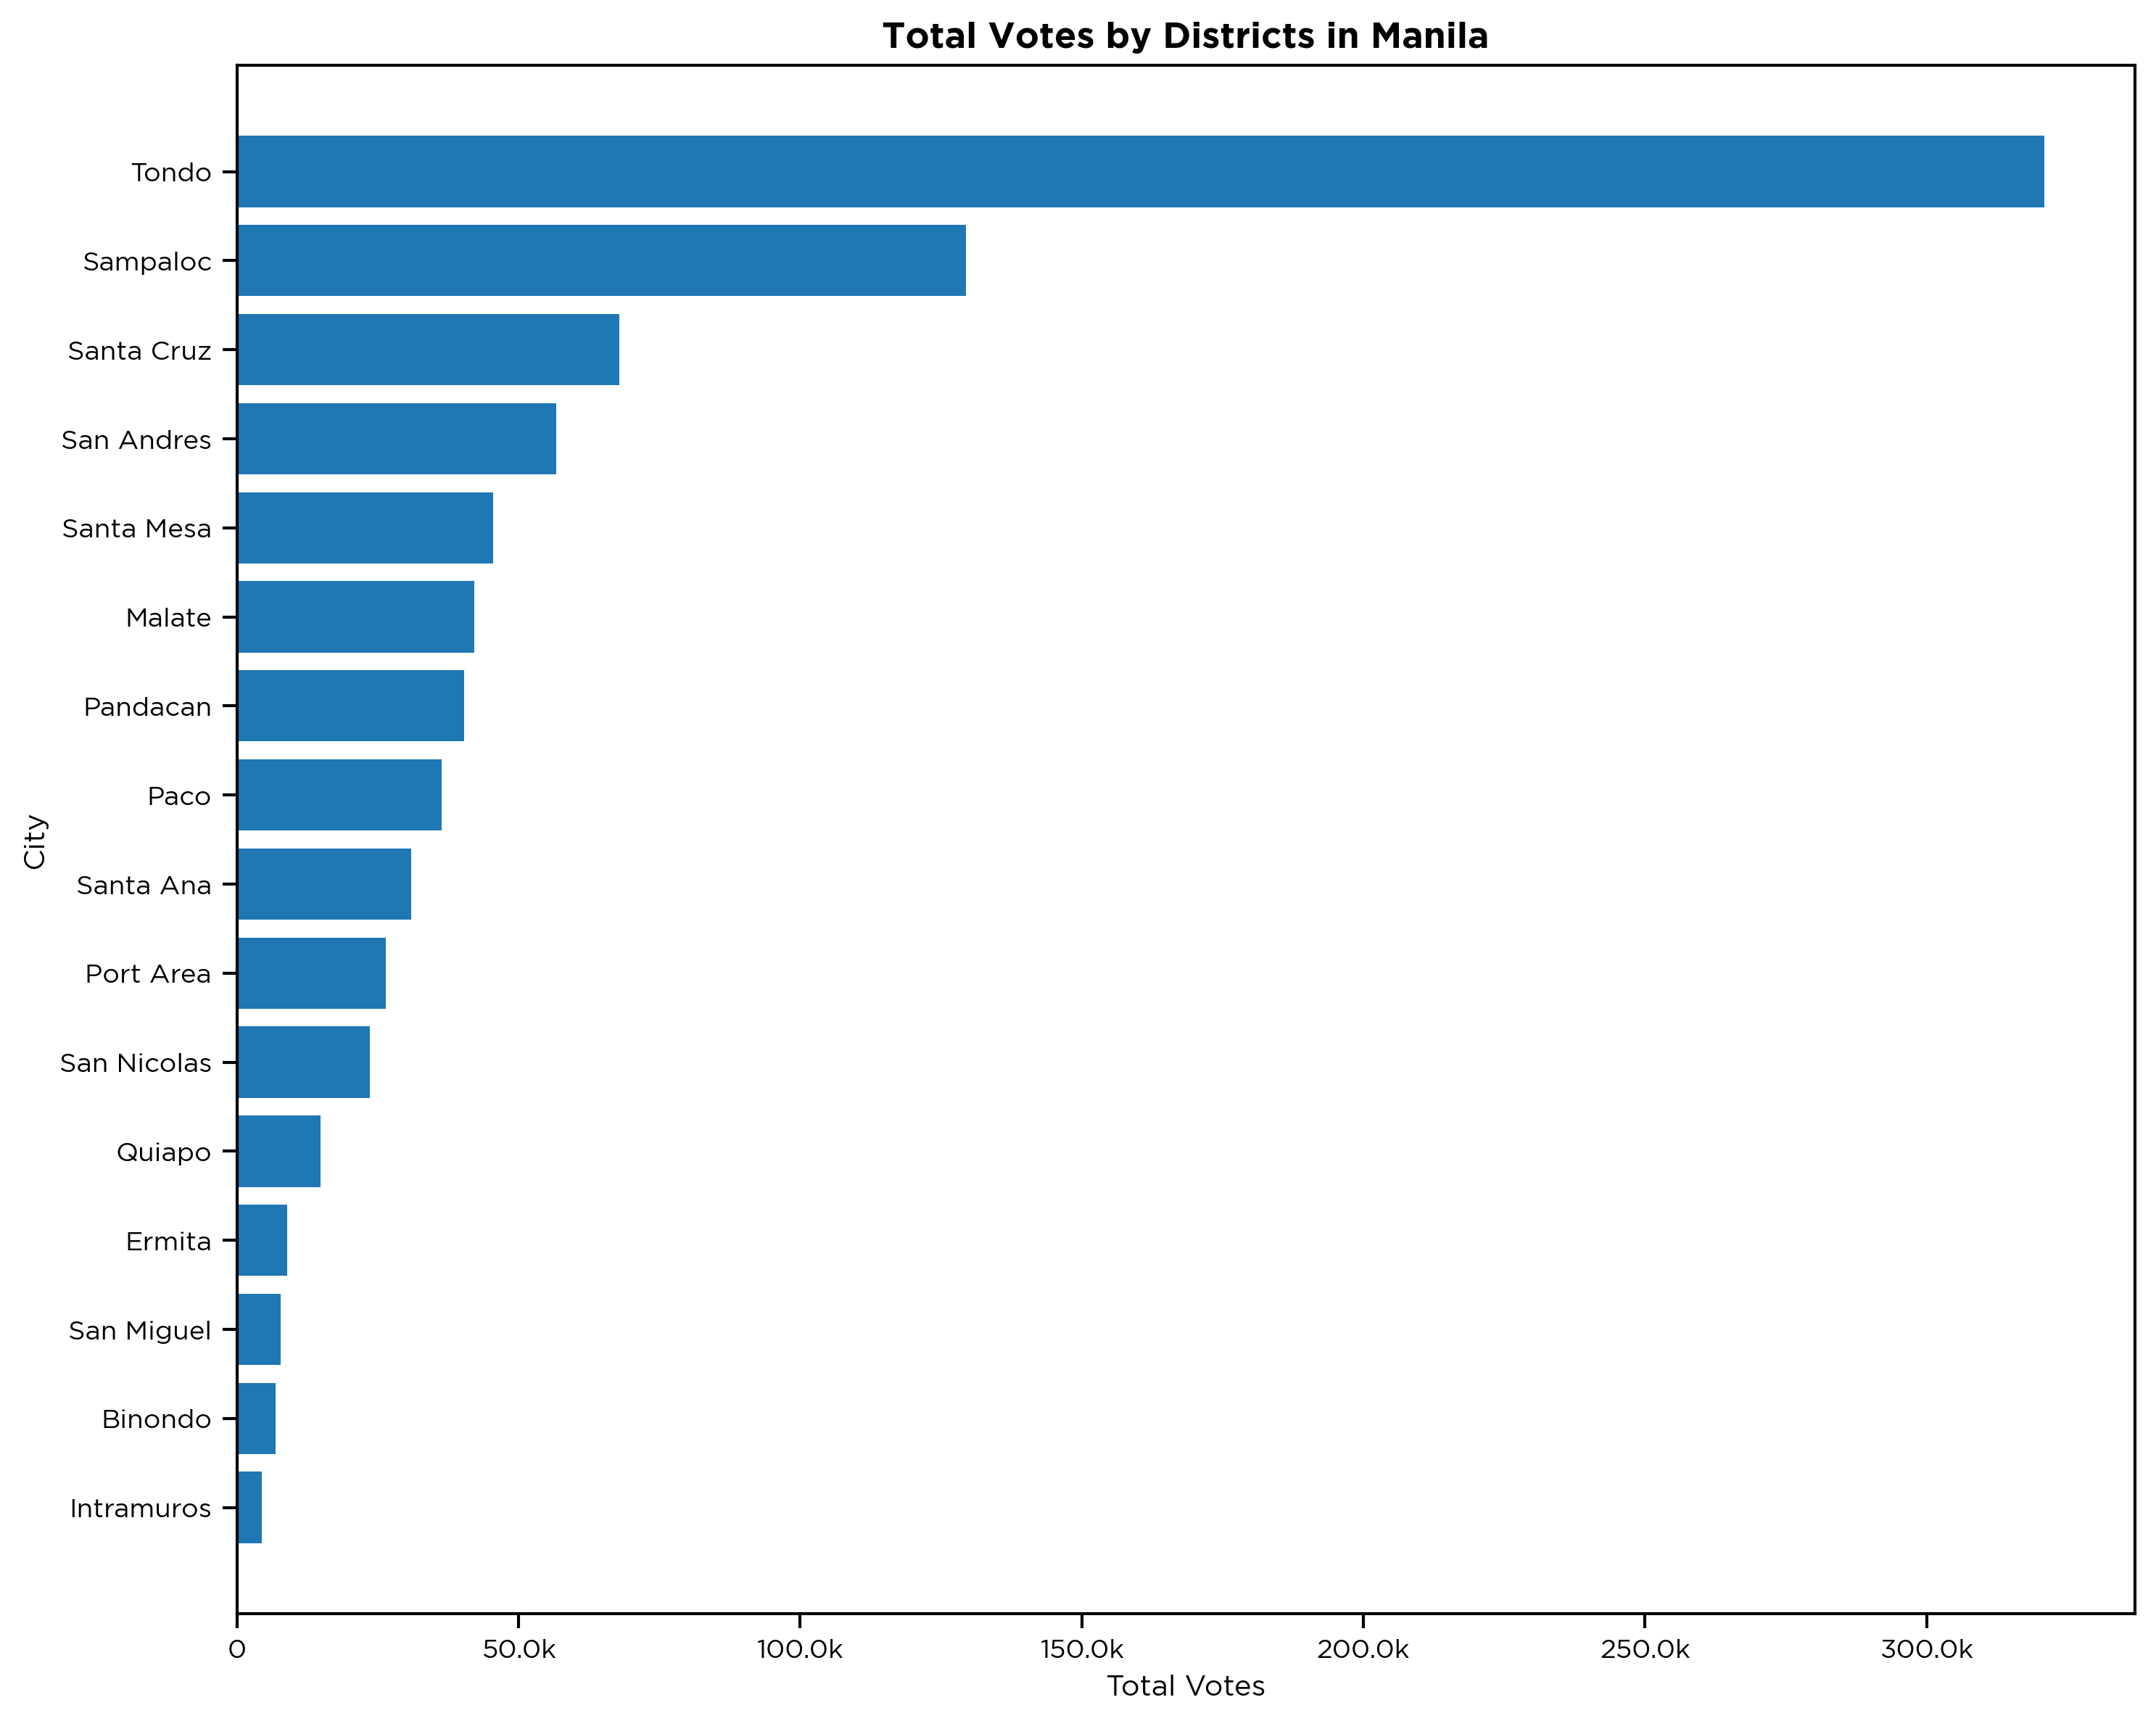

In [57]:
df_manilacityproper_vpgrp = pd.DataFrame(df_manilacityproper_vpgrp)

# Create the plot
plt.figure(figsize=(10, 8))
plt.barh(df_manilacityproper_vpgrp['city'], df_manilacityproper_vpgrp['total_votes'])

# Adding title and labels
plt.title('Total Votes by Districts in Manila', fontsize=12, fontweight='bold')
plt.xlabel('Total Votes')
plt.ylabel('City')

# Apply the custom tick formatter to the x-axis
formatter = ticker.FuncFormatter(format_ticks)

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Save the plot
plot_path = os.path.join(plot_dir, 'manila_vp_totalvotes.png')
plt.savefig(plot_path, dpi=600, bbox_inches='tight', pad_inches=0.125)

plt.tight_layout()

# Show the plot
plt.show()

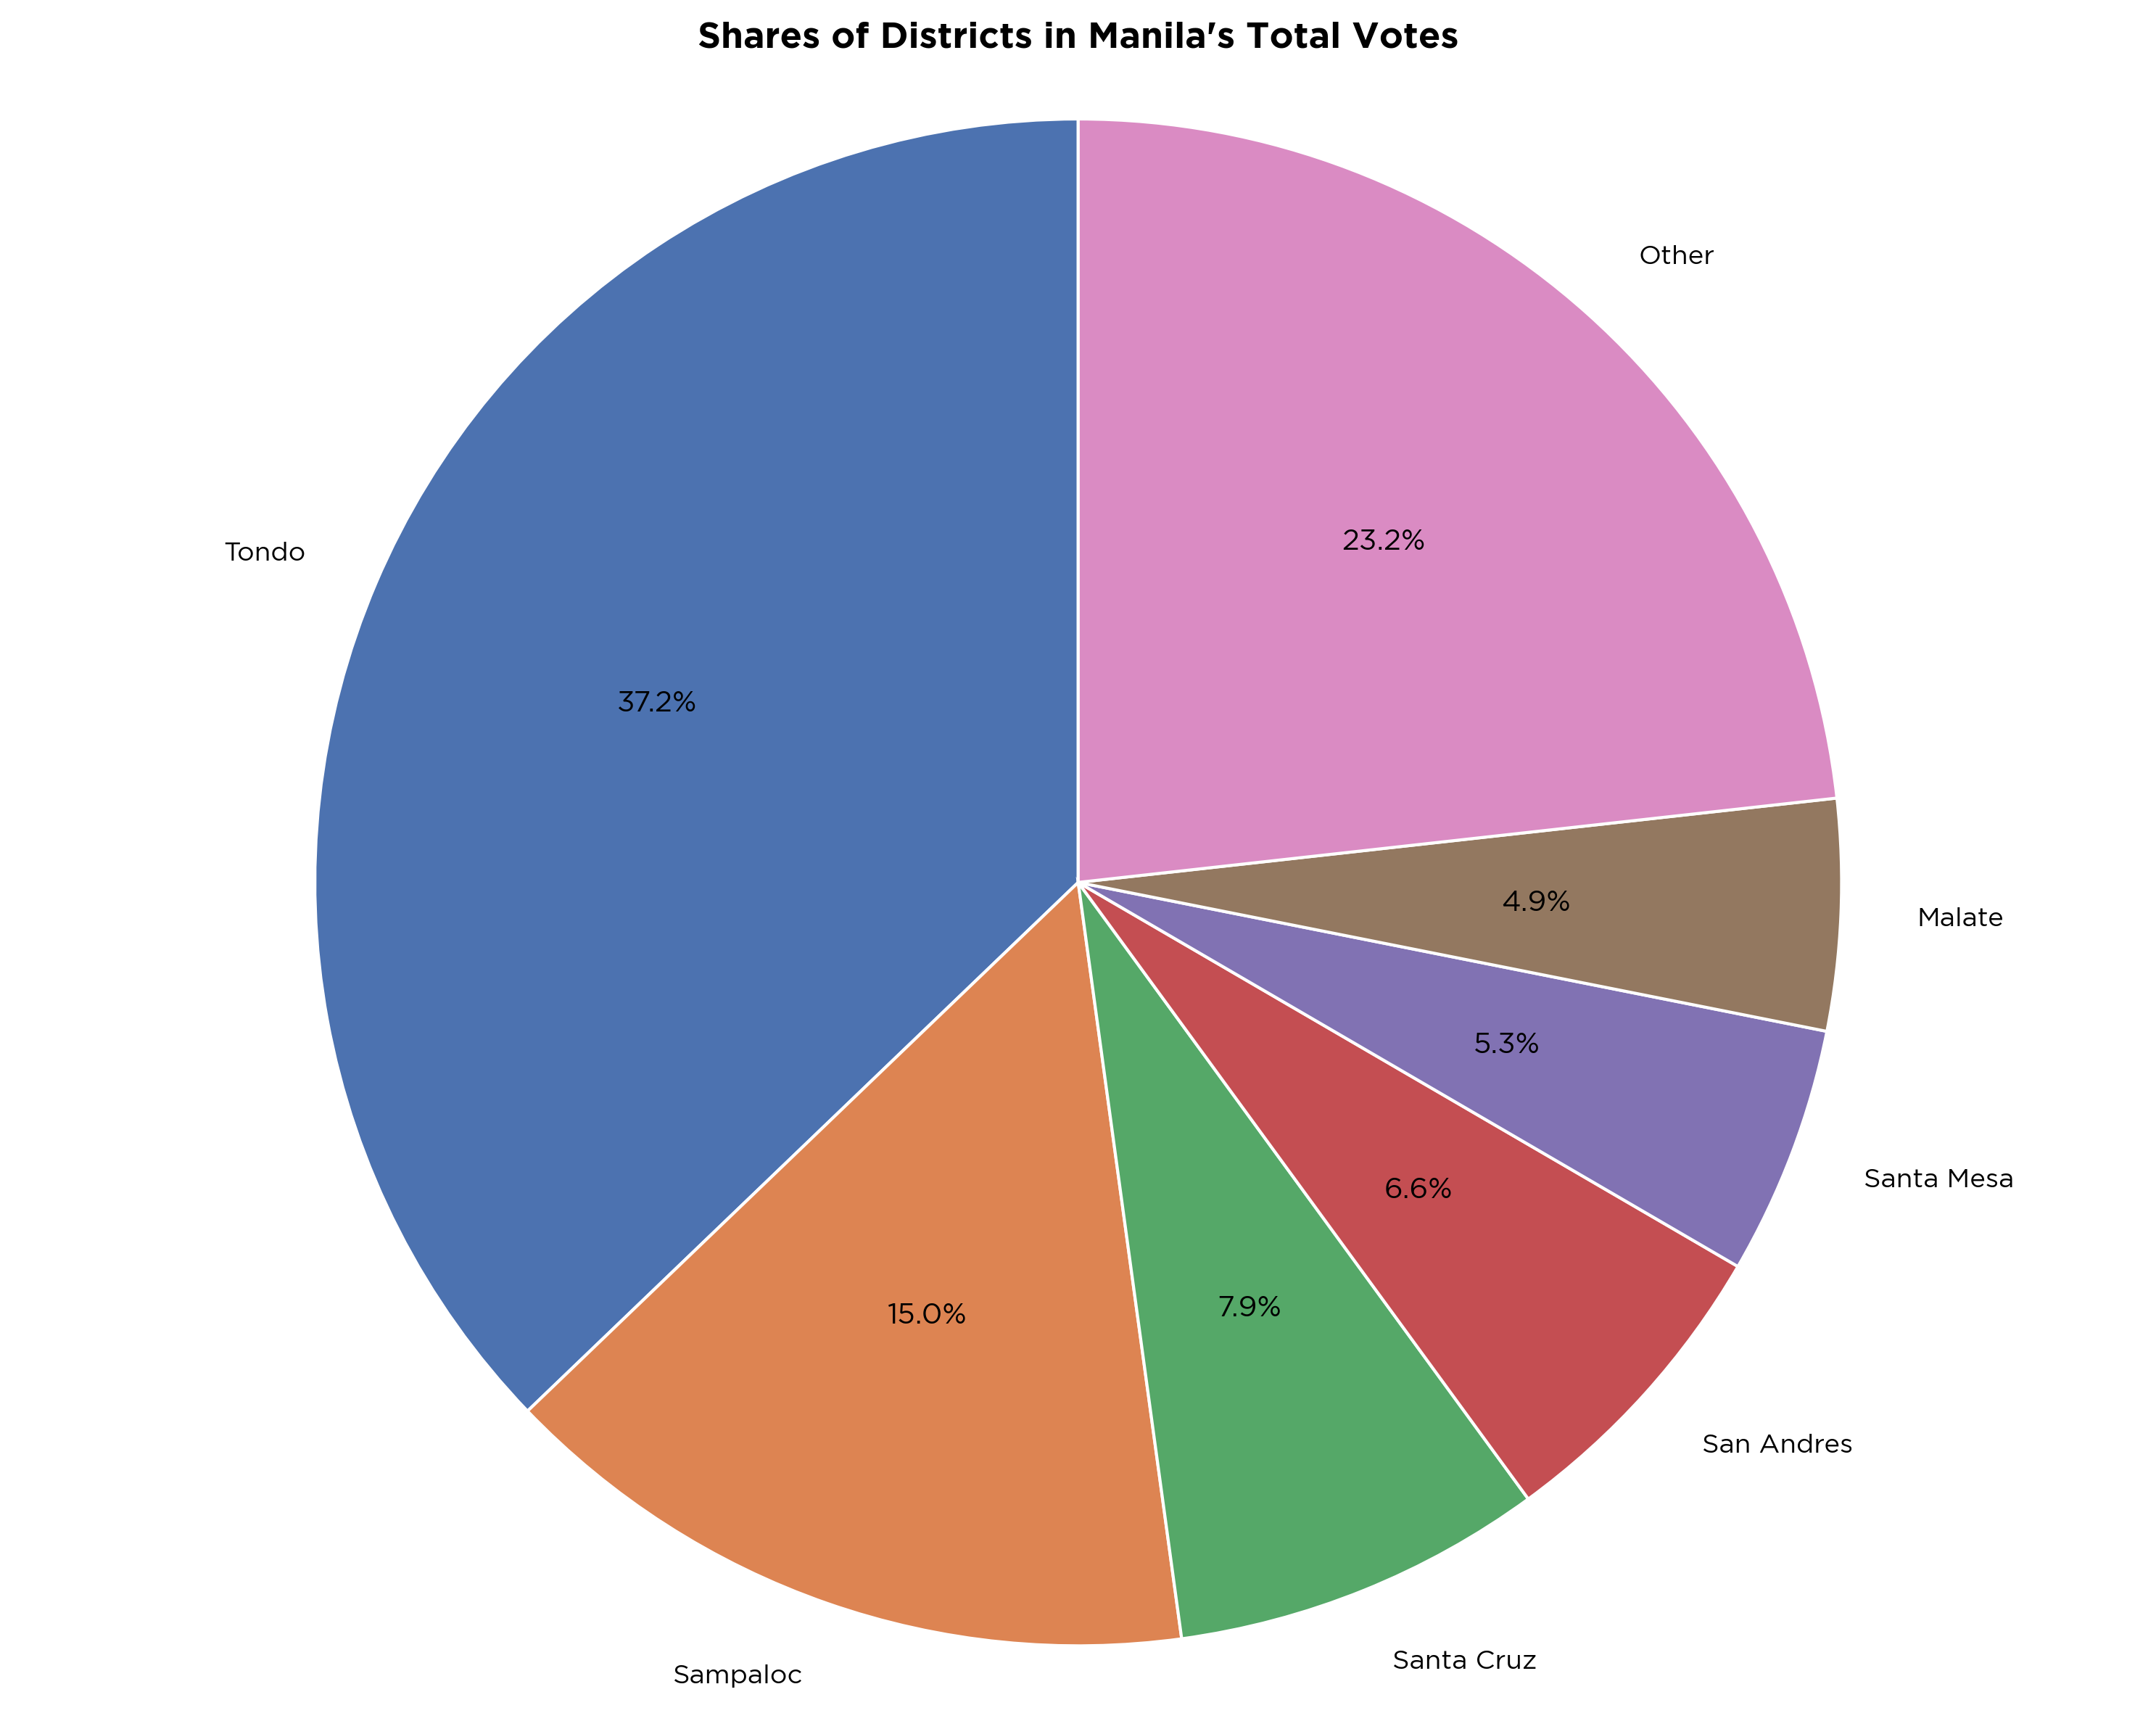

In [58]:
top_5_maniladisvp = df_manilacityproper_vpgrp.nlargest(6, 'total_votes')
other_maniladisvp = df_manilacityproper_vpgrp['total_votes'].sum() - top_5_maniladisvp['total_votes'].sum()

maniladisvp = pd.concat([top_5_maniladisvp, pd.DataFrame({'city': ['Other'], 'total_votes': [other_maniladisvp]})])

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(maniladisvp['total_votes'], labels=maniladisvp['city'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('deep', len(maniladisvp)), wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Shares of Districts in Manila\'s Total Votes', fontsize=12, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plot_path = os.path.join(plot_dir, 'manila_districts_pie_vp.png')
plt.savefig(plot_path, dpi=600, bbox_inches='tight', pad_inches=0.125)

plt.tight_layout()

# Show the plot
plt.show()

#### Visualizing votes

In [59]:
df_manilacityproper_vpgrp.columns

Index(['city', 'total_votes', 'vp_4_duterte', 'vp_6_ong', 'vp_7_pangilinan',
       'vp_9_sotto', 'Others'],
      dtype='object')

In [60]:
def plot_stacked_bar_chart(data, category, title, xlabel, ylabel, filename):
    categories = data[category]
    dut_votes = data['vp_4_duterte']
    pang_votes = data['vp_7_pangilinan']
    sot_votes = data['vp_9_sotto']
    ong_votes = data['vp_6_ong']
    others_votes = data['Others']

    plt.figure(figsize=(12, 8))

    bar_width = 0.75

    plt.barh(categories, dut_votes, bar_width, label='Duterte', color='forestgreen', linewidth=0.5, edgecolor='black')
    plt.barh(categories, pang_votes, bar_width, left=dut_votes, label='Pangilinan', color='violet', linewidth=0.5, edgecolor='black')
    plt.barh(categories, sot_votes, bar_width, left=dut_votes+pang_votes, label='Sotto', color='navy', linewidth=0.5, edgecolor='black')
    plt.barh(categories, ong_votes, bar_width, left=dut_votes+pang_votes+sot_votes, label='Ong', color='royalblue', linewidth=0.5, edgecolor='black')
    plt.barh(categories, others_votes, bar_width, left=dut_votes+pang_votes+sot_votes+ong_votes, label='Others', color='grey', linewidth=0.5, edgecolor='black')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0, ha='center')
    plt.legend(fontsize=8)

    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path, dpi=600, bbox_inches='tight', pad_inches=0.125)

    plt.tight_layout()

    plt.show()

In [61]:
def plot_stacked_bar_chart_norm(data, category, title, xlabel, ylabel, filename):
    categories = data[category]
    total_votes = data['total_votes']
    dut_votes = data['vp_4_duterte'] / total_votes * 100
    pang_votes = data['vp_7_pangilinan'] / total_votes * 100
    sot_votes = data['vp_9_sotto'] / total_votes * 100
    ong_votes = data['vp_6_ong'] / total_votes * 100
    others_votes = data['Others'] / total_votes * 100

    plt.figure(figsize=(12, 8))

    bar_width = 0.75

    plt.barh(categories, dut_votes, bar_width, label='Duterte', color='forestgreen', linewidth=0.5, edgecolor='black')
    plt.barh(categories, pang_votes, bar_width, left=dut_votes, label='Pangilinan', color='violet', linewidth=0.5, edgecolor='black')
    plt.barh(categories, sot_votes, bar_width, left=dut_votes+pang_votes, label='Sotto', color='navy', linewidth=0.5, edgecolor='black')
    plt.barh(categories, ong_votes, bar_width, left=dut_votes+pang_votes+sot_votes, label='Ong', color='royalblue', linewidth=0.5, edgecolor='black')
    plt.barh(categories, others_votes, bar_width, left=dut_votes+pang_votes+sot_votes+ong_votes, label='Others', color='grey', linewidth=0.5, edgecolor='black')

    plt.axvline(x=50, color='black', linestyle='--', linewidth=1, label='Majority indicator')

    plt.title(title, fontsize=12, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(0, 100)
    plt.xticks(rotation=0, ha='center')
    plt.legend(fontsize=8, bbox_to_anchor=(1.01, 1.005), loc='upper left')

    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path, dpi=600, bbox_inches='tight', pad_inches=0.125)
    
    plt.tight_layout()

    plt.show()

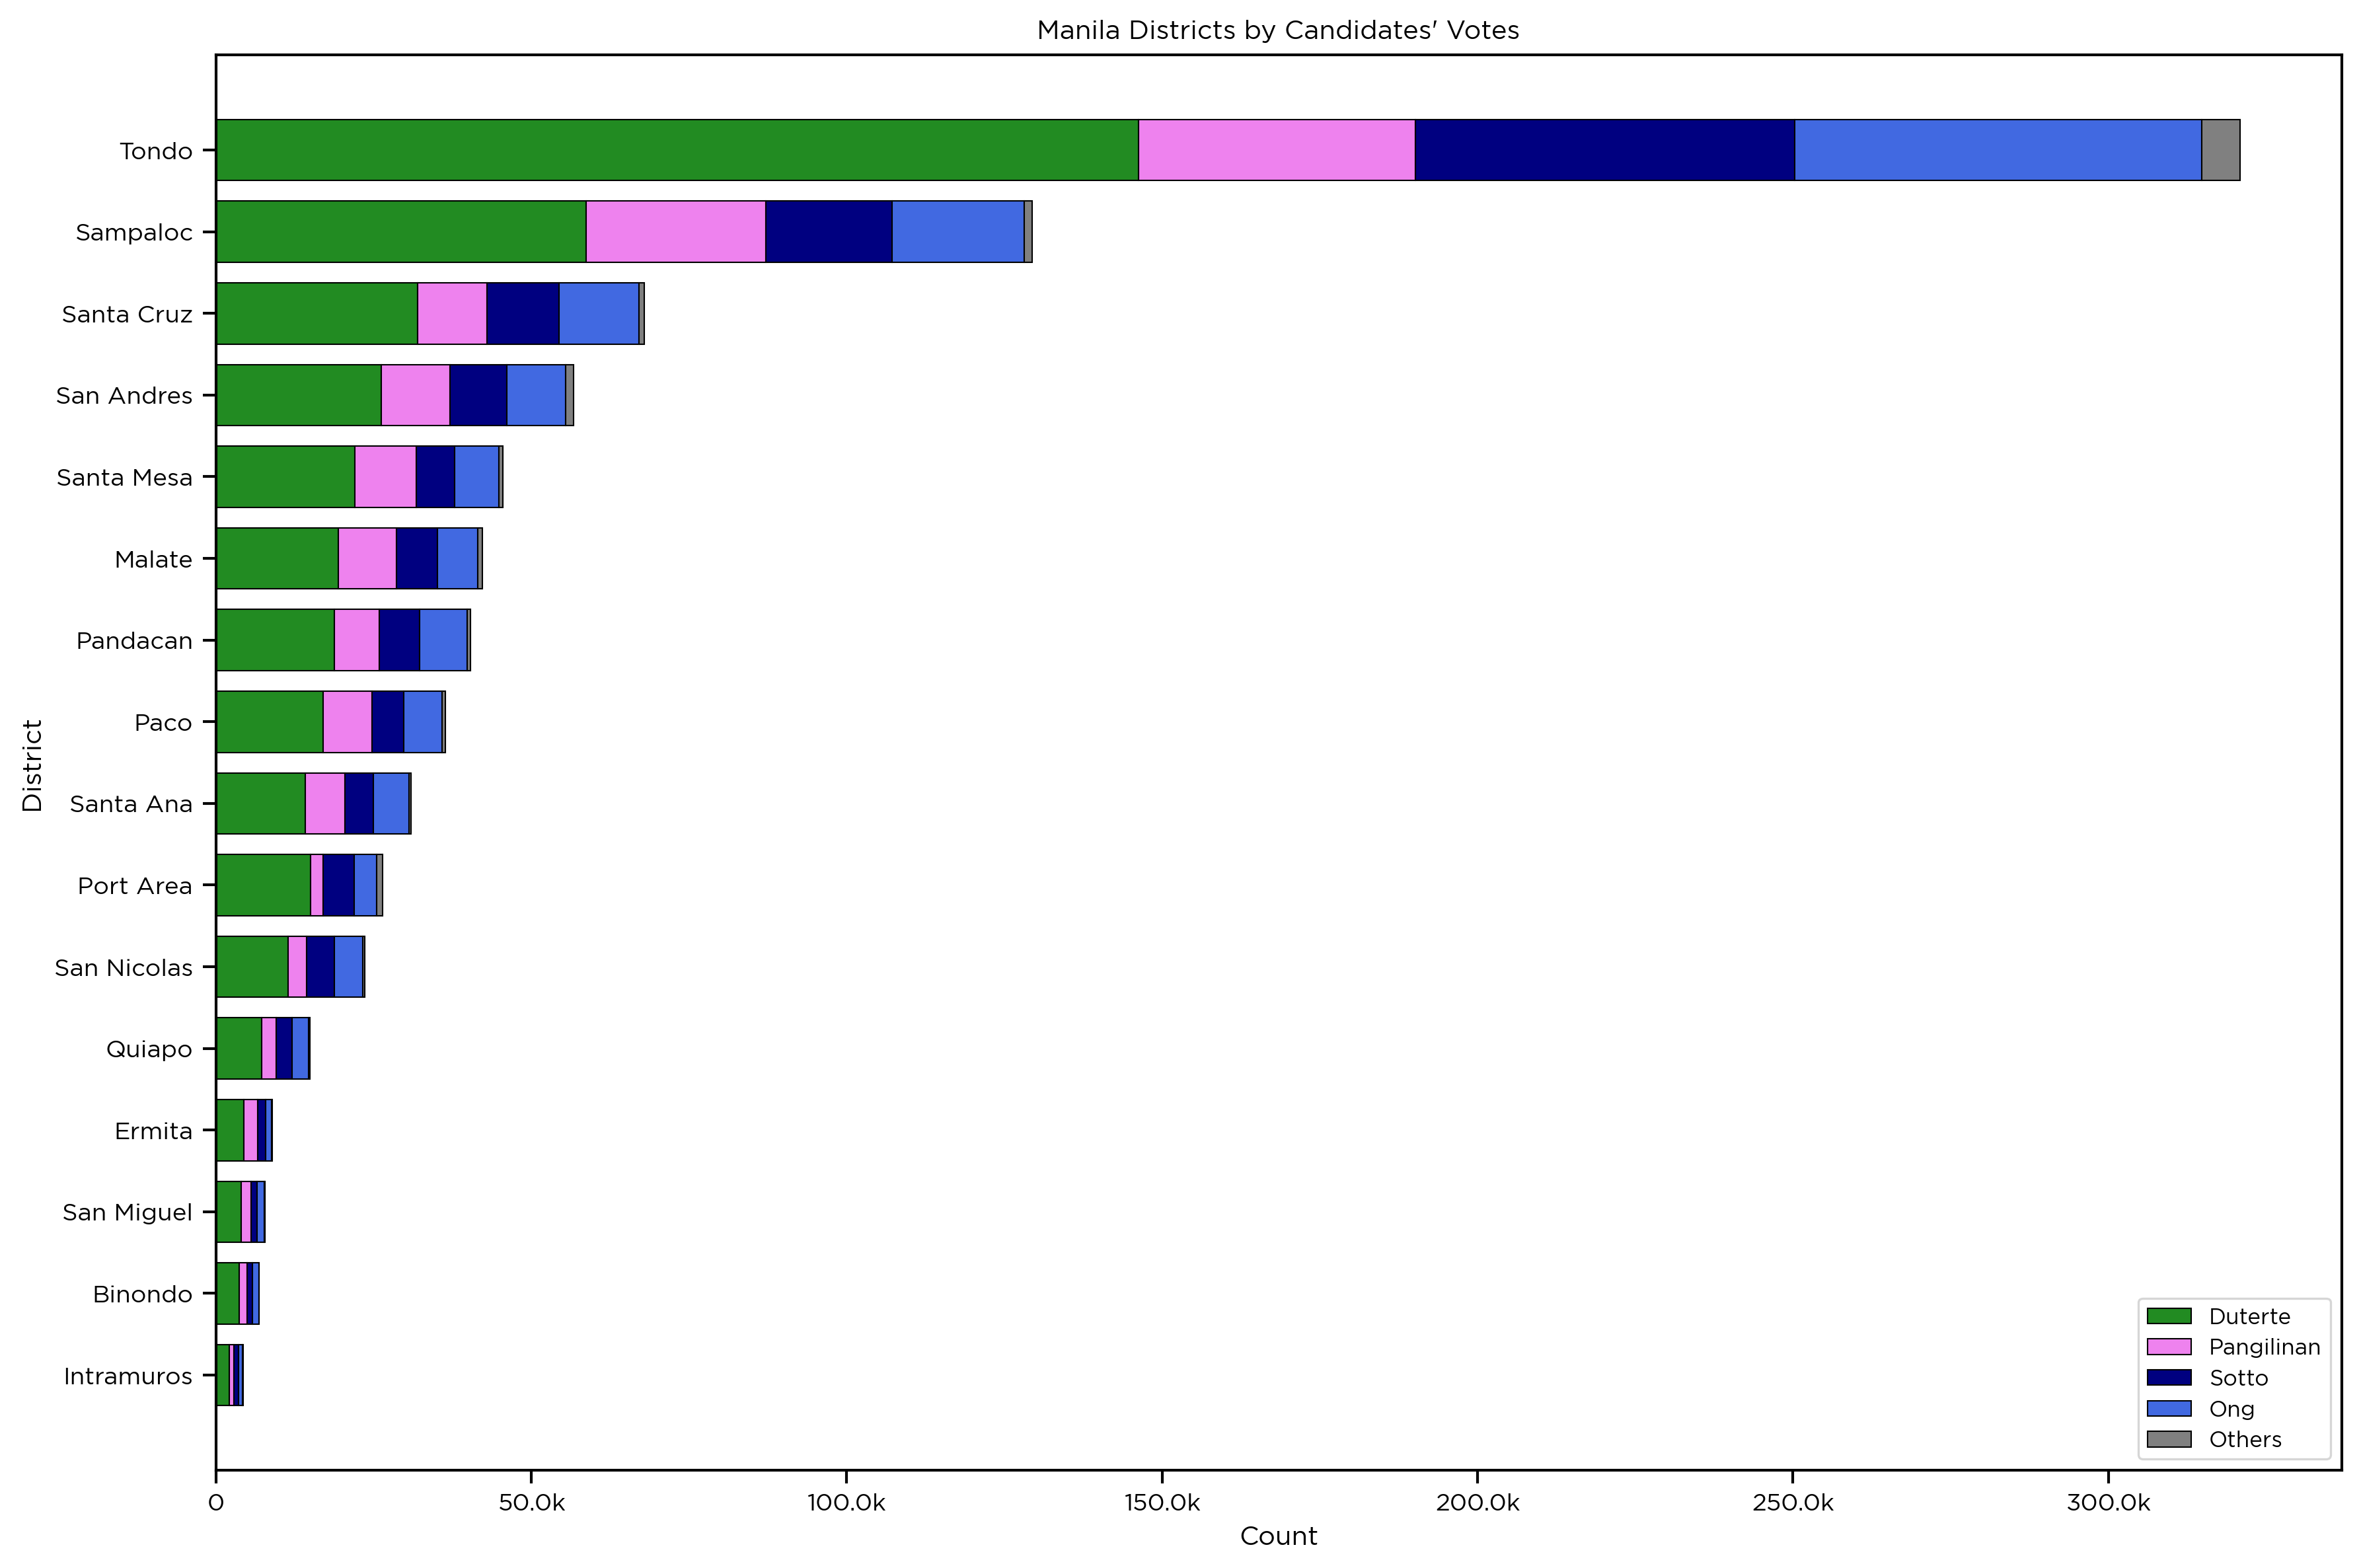

In [62]:
plot_stacked_bar_chart(df_manilacityproper_vpgrp, 'city', 'Manila Districts by Candidates\' Votes', 'Count', 'District', 'manila_district_vp_votes_stack.png')

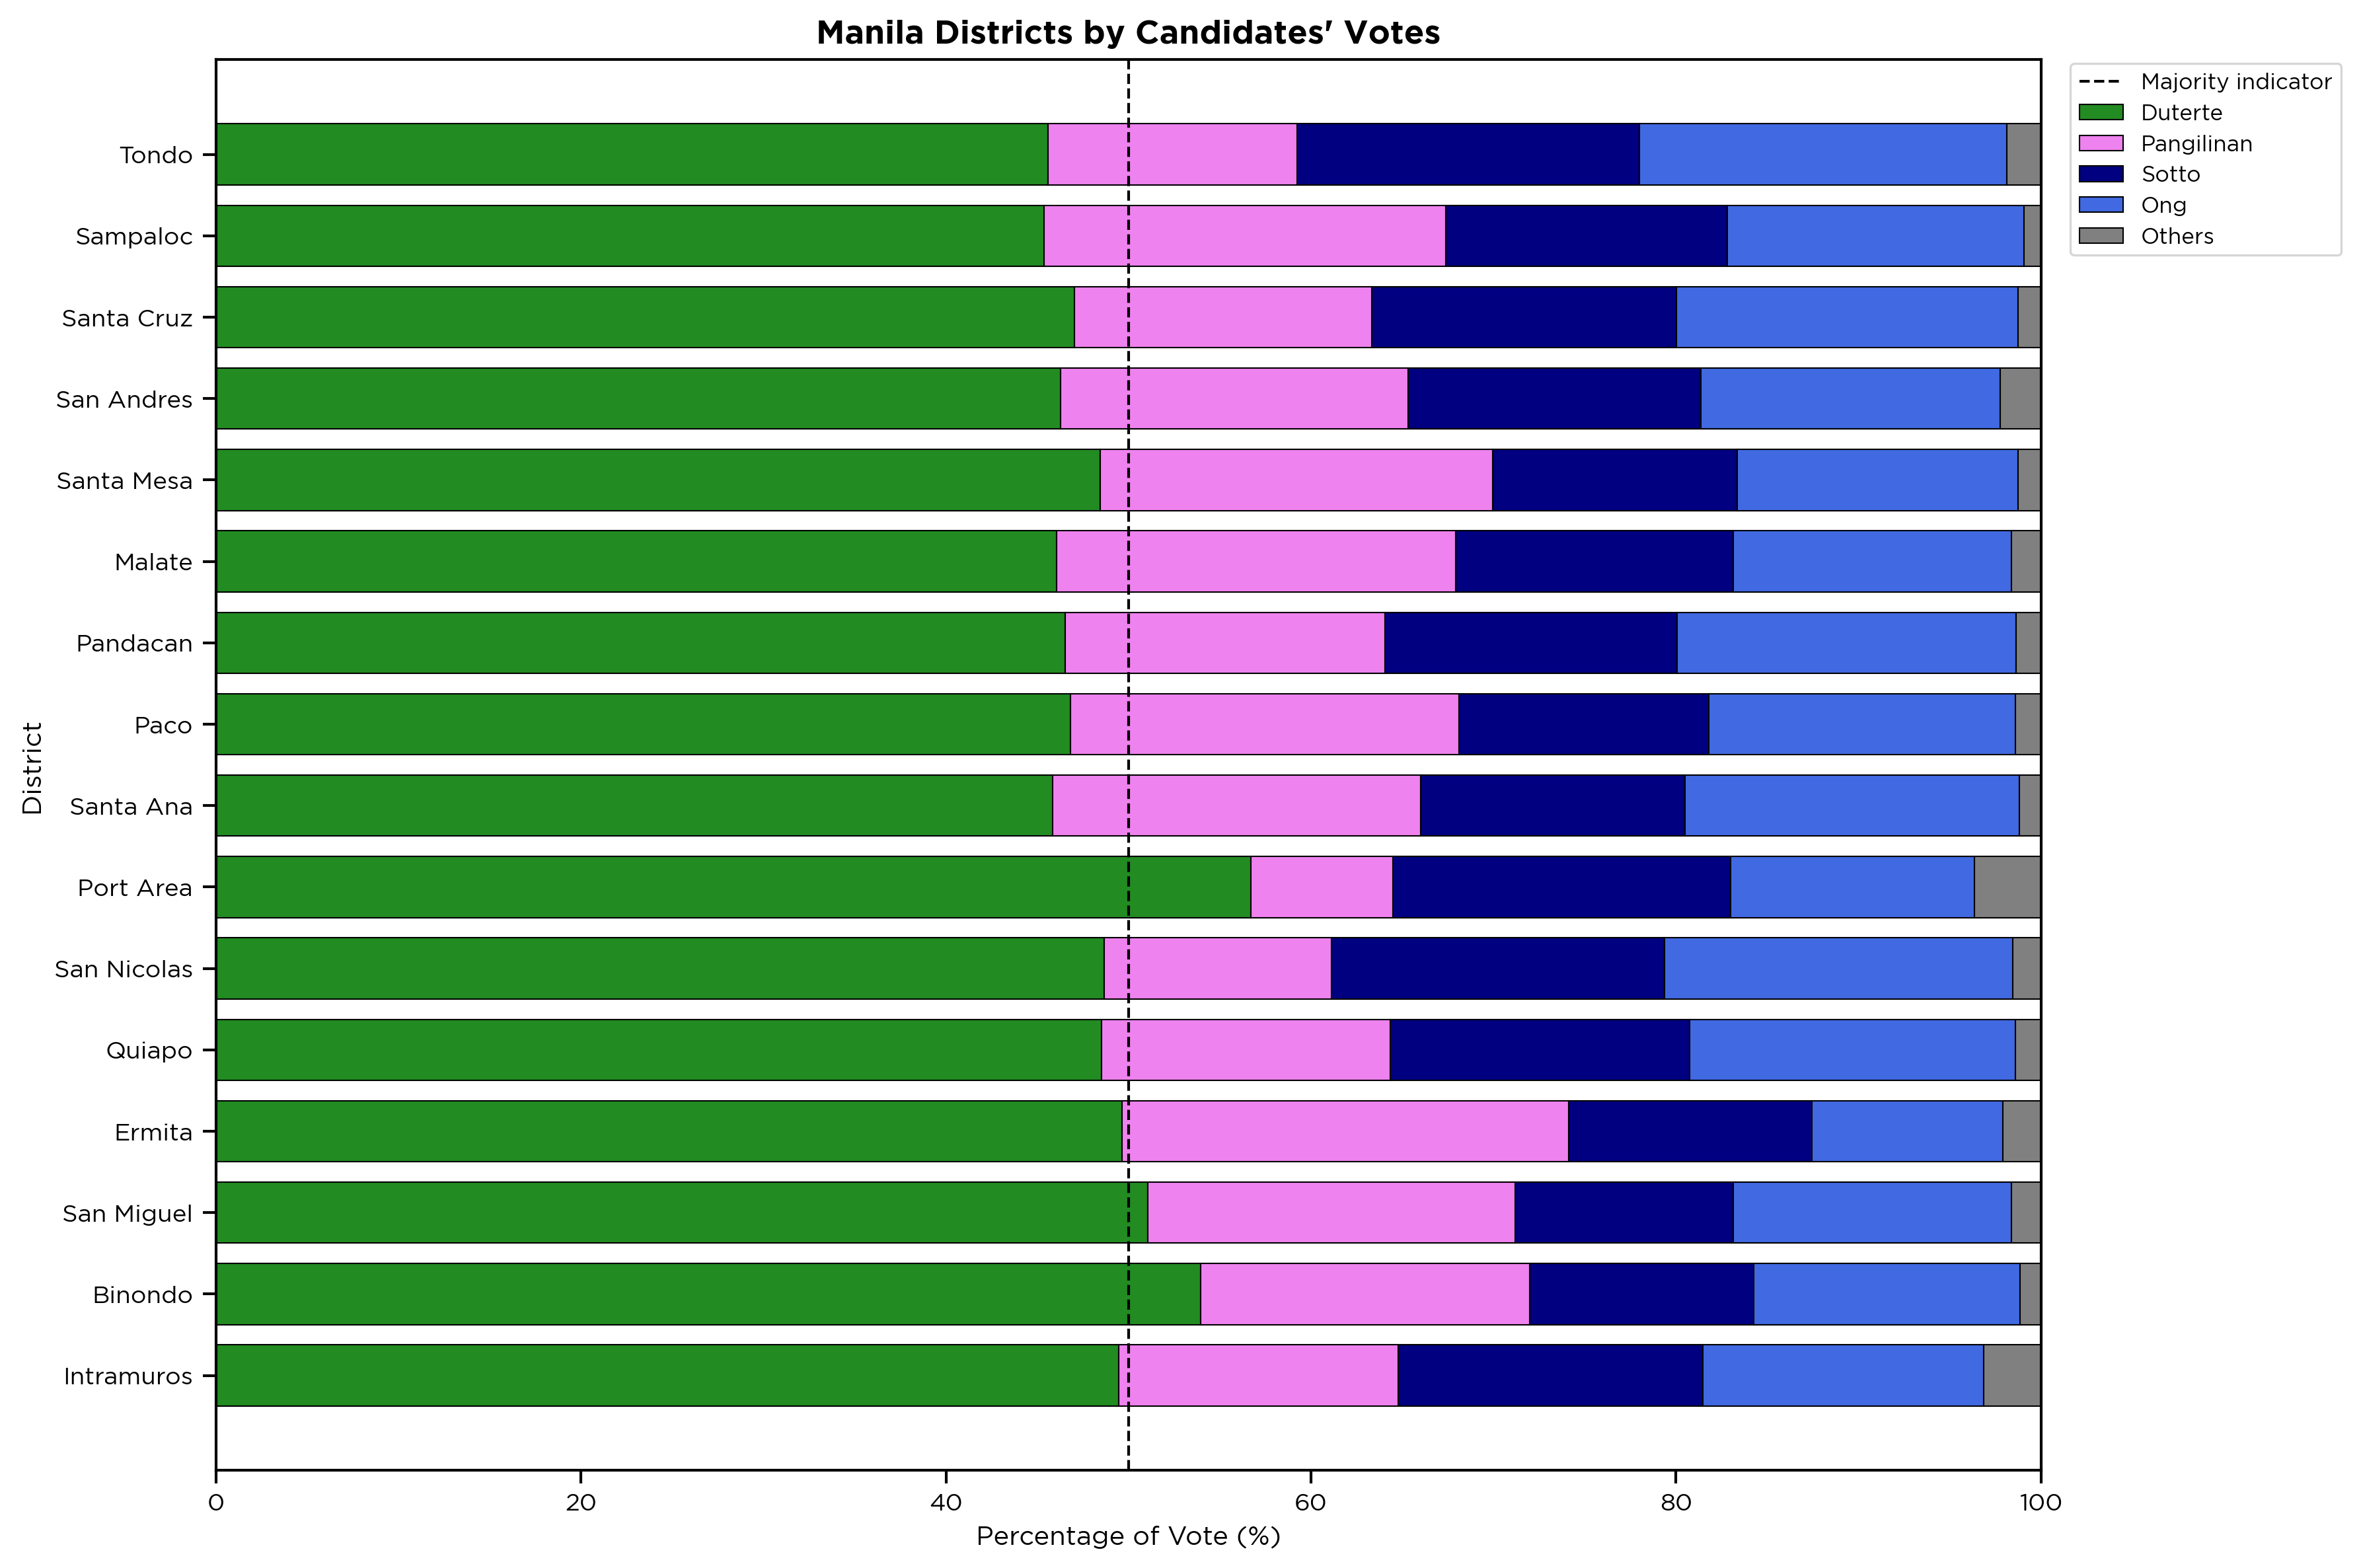

In [63]:
plot_stacked_bar_chart_norm(df_manilacityproper_vpgrp, 'city', 'Manila Districts by Candidates\' Votes', 'Percentage of Vote (%)', 'District', 'manila_district_vp_votes_stack_norm.png')

In [66]:
def dodge_bar_chart(data, category, filename, xlabel='Votes', ylabel='District', title='Dodged Bar Chart of Votes by District'):
    # Sort the data by total votes
    data_sorted = data.sort_values(by='total_votes', ascending=True)

    # Split the data into top and bottom halves
    half_len = len(data_sorted) // 2
    top_districts = data_sorted.iloc[half_len:]
    bottom_districts = data_sorted.iloc[:half_len]

    fig, axes = plt.subplots(1, 2, figsize=(16,10))

    for ax, districts in zip(axes, [top_districts, bottom_districts]):
        categories = districts[category]
        total_votes = districts['total_votes']
        duterte_votes = districts['vp_4_duterte'] / total_votes * 100
        pangilinan_votes = districts['vp_7_pangilinan'] / total_votes * 100
        sotto_votes = districts['vp_9_sotto'] / total_votes * 100
        ong_votes = districts['vp_6_ong'] / total_votes * 100

        bar_width = 0.2  # Adjust the bar width
        bar_padding = 0.225  # Adjust the padding between bars

        center = np.arange(len(categories))

        bars1 = ax.barh(center + bar_padding * 1.5, duterte_votes, bar_width, label='Duterte', color='forestgreen', linewidth=0.5, edgecolor='black')
        bars2 = ax.barh(center + bar_padding * 0.5, pangilinan_votes, bar_width, label='Pangilinan', color='violet', linewidth=0.5, edgecolor='black')
        bars3 = ax.barh(center - bar_padding * 0.5, sotto_votes, bar_width, label='Sotto', color='navy', linewidth=0.5, edgecolor='black')
        bars4 = ax.barh(center - bar_padding * 1.5, ong_votes, bar_width, label='Ong', color='royalblue', linewidth=0.5, edgecolor='black')

        for bar1, bar2, bar3, bar4, city in zip(bars1, bars2, bars3, bars4, categories):
            ax.text(bar1.get_width() + 1, bar1.get_y() + bar1.get_height() / 2, f'{bar1.get_width():.2f}%', ha='left', va='center', fontsize=8)
            ax.text(bar2.get_width() + 1, bar2.get_y() + bar2.get_height() / 2, f'{bar2.get_width():.2f}%', ha='left', va='center', fontsize=8)
            ax.text(bar3.get_width() + 1, bar3.get_y() + bar3.get_height() / 2, f'{bar3.get_width():.2f}%', ha='left', va='center', fontsize=8)
            ax.text(bar4.get_width() + 1, bar4.get_y() + bar4.get_height() / 2, f'{bar4.get_width():.2f}%', ha='left', va='center', fontsize=8)

        # Set plot title and labels
        ax.set_xlabel(xlabel + ' (%)')
        ax.set_ylabel(ylabel)
        ax.set_yticks(np.arange(len(categories)))
        ax.set_yticklabels(categories)
        ax.set_xlim(0, 100)

        # Add legend
        ax.legend(title='Candidates', loc='upper right')

        # Rotate x-axis labels for better readability
        ax.tick_params(axis='x', rotation=0)

    plt.suptitle('Dodged Bar Chart of Votes for Manila\'s Top Four Candidates by District', fontsize=14, fontweight='bold')

    plt.subplots_adjust(wspace=0.2)  # Change the spacing as needed
    plt.tight_layout()
    
    # Save the plot as an image

    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path, dpi=600, bbox_inches='tight', pad_inches=0.125)
    
    plt.show()

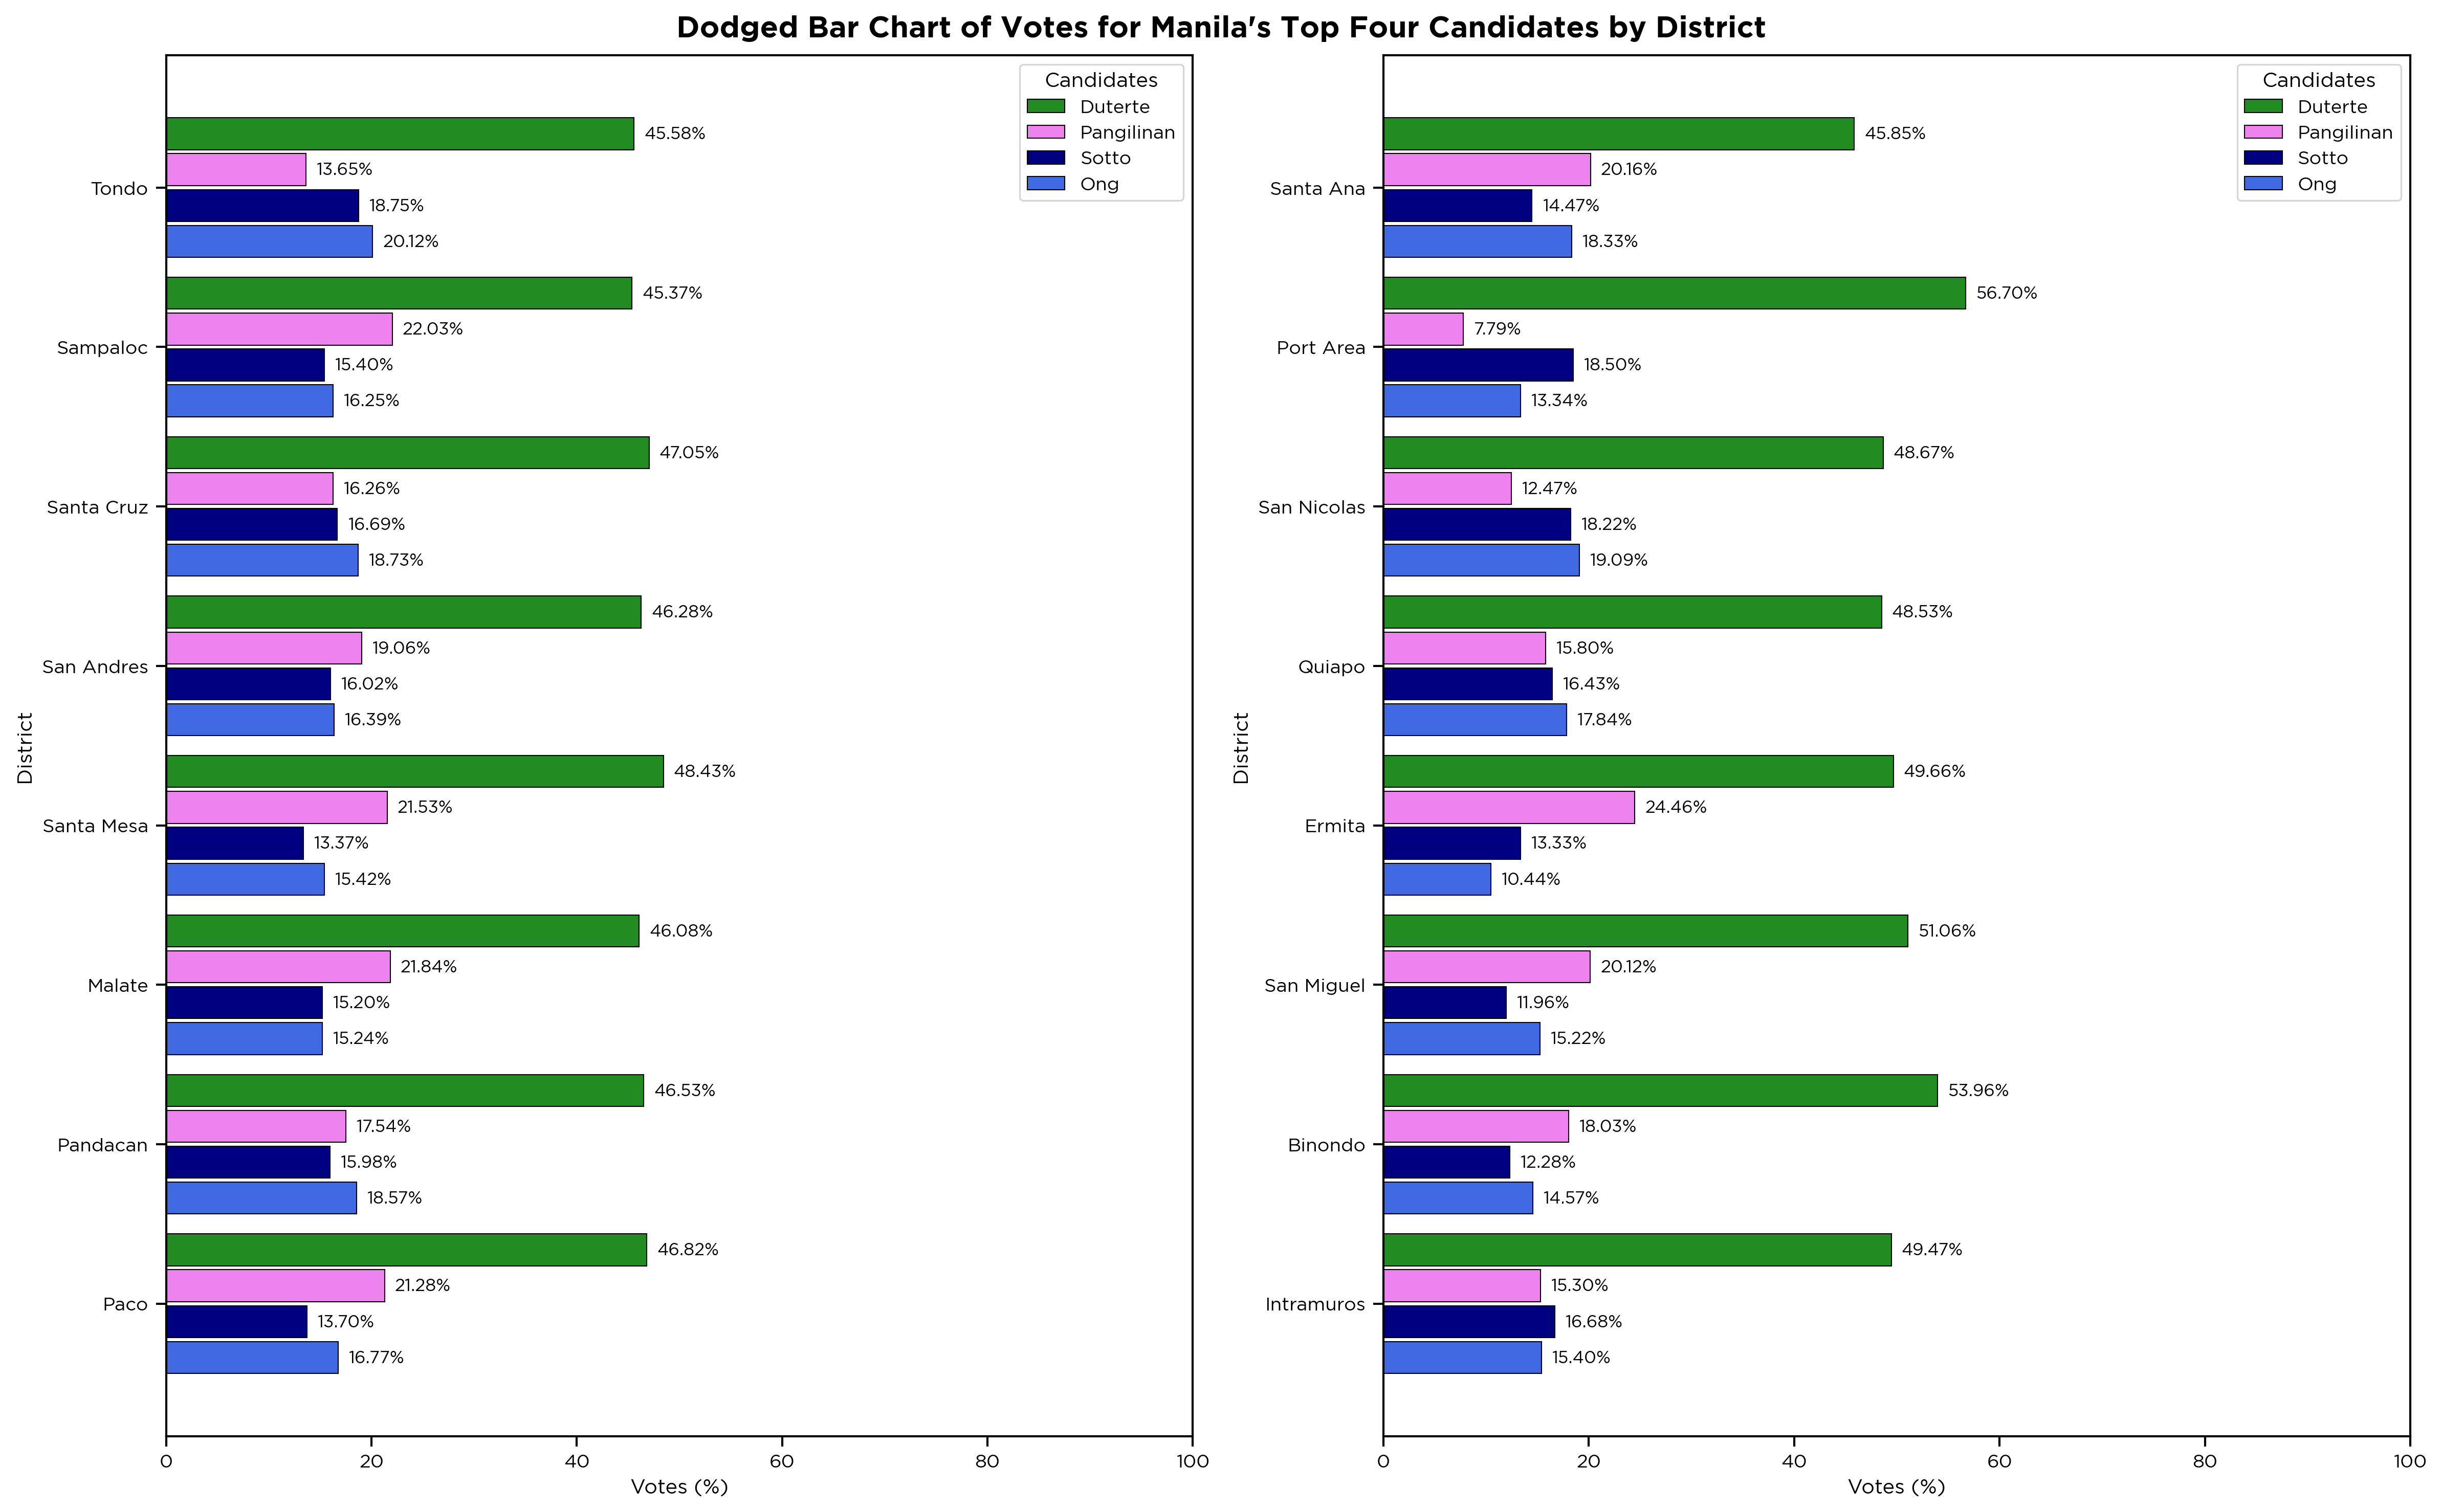

In [67]:
dodge_bar_chart(df_manilacityproper_vpgrp, 'city', 'dodged_bar_dist_vpvotes', xlabel='Votes', ylabel='District', title='Dodged Bar Chart of Votes for Manila\'s Top Candidates by District')